In [1]:
import pandas as pd
import numpy as np
from open_fdd.air_handling_unit.faults.helper_utils import HelperUtils

In [2]:
# Load your data
ahu_data = r"C:\Users\bbartling\Documents\WPCRC_Master.csv"
df = pd.read_csv(ahu_data)

df.head()

timestamp  HWR_value  HWS_value  Heat_Calls  Oa_Temp  \
0  2023-10-01 00:00:00      73.72      73.04         0.0    72.31   
1  2023-10-01 00:05:00      73.72      73.04         0.0    72.22   
2  2023-10-01 00:10:00      73.71      73.04         0.0    72.22   
3  2023-10-01 00:15:00      73.71      73.05         0.0    72.15   
4  2023-10-01 00:20:00      73.70      73.08         0.0    72.09   

   OaTemp_Enable  CWR_Temp  CWS_Temp  CWS_Freeze_SPt  CW_Valve  ...  MA_Temp  \
0           65.0     57.65     55.06             5.0       0.0  ...    73.92   
1           65.0     57.75     55.18             5.0       0.0  ...    73.92   
2           65.0     57.75     55.18             5.0       0.0  ...    73.97   
3           65.0     57.85     55.25             5.0       0.0  ...    74.01   
4           65.0     57.95     55.31             5.0       0.0  ...    74.01   

   EffSetpoint  EaDamper  SpaceTemp  RA_CO2  RA_Temp  VAV2_6_SpaceTemp  \
0         76.0       0.0      70.83  480.97    73.69              72.1   
1         76.0       0.0      70.83  480.97    73.69              72.1   
2         76.0       0.0      70.82  479.02    73.69              72.1   
3         76.0       0.0      70.82  480.96    73.68              72.1   
4         76.0       0.0      70.80  480.95    73.63              72.1   

   VAV2_7_SpaceTemp  VAV3_2_SpaceTemp  VAV3_5_SpaceTemp  
0             73.94             66.99             67.23  
1             73.94             66.99             67.23  
2             73.94             66.99             67.23  
3             73.94             66.99             67.23  
4             73.94             66.99             67.23  

[5 rows x 44 columns]

In [3]:
df.columns

Index(['timestamp', 'HWR_value', 'HWS_value', 'Heat_Calls', 'Oa_Temp',
       'OaTemp_Enable', 'CWR_Temp', 'CWS_Temp', 'CWS_Freeze_SPt', 'CW_Valve',
       'HW_Valve', 'DischargeTemp', 'Eff_DaSP', 'RaHumidity', 'Ra_Temp',
       'Ra_FanSpeed', 'OaTemp', 'Ma_Dampers', 'Ma_Temp', 'SaStaticSPt',
       'Sa_FanSpeed', 'SaTempSP', 'RaCO2', 'SaStatic', 'CurrentKWHrs',
       'CurrentKW', 'Eff_DaSPt', 'RaTemp', 'MaLowSPt', 'MaDampers',
       'SaStatic_SPt', 'SaTempSPt', 'CoolValve', 'OA_Damper', 'MA_Temp',
       'EffSetpoint', 'EaDamper', 'SpaceTemp', 'RA_CO2', 'RA_Temp',
       'VAV2_6_SpaceTemp', 'VAV2_7_SpaceTemp', 'VAV3_2_SpaceTemp',
       'VAV3_5_SpaceTemp'],
      dtype='object')

In [4]:
# Filter the DataFrame
filtered_df = df[(df['Sa_FanSpeed'] > 15.0) & (df['Oa_Temp'] < 10.0)]

# Get the description of the 'OA_Damper' column
oa_damper_description = filtered_df['OA_Damper'].describe()

# Print the description
oa_damper_description

count    3339.000000
mean        9.216119
std         9.964637
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        20.000000
Name: OA_Damper, dtype: float64

In [5]:
# Checking data types of each column
print("Data Types:")
print(df.dtypes)

Data Types:
timestamp            object
HWR_value           float64
HWS_value           float64
Heat_Calls          float64
Oa_Temp             float64
OaTemp_Enable       float64
CWR_Temp            float64
CWS_Temp            float64
CWS_Freeze_SPt      float64
CW_Valve            float64
HW_Valve            float64
DischargeTemp       float64
Eff_DaSP            float64
RaHumidity          float64
Ra_Temp             float64
Ra_FanSpeed         float64
OaTemp              float64
Ma_Dampers          float64
Ma_Temp             float64
SaStaticSPt         float64
Sa_FanSpeed         float64
SaTempSP            float64
RaCO2               float64
SaStatic            float64
CurrentKWHrs        float64
CurrentKW           float64
Eff_DaSPt           float64
RaTemp              float64
MaLowSPt            float64
MaDampers           float64
SaStatic_SPt        float64
SaTempSPt           float64
CoolValve           float64
OA_Damper           float64
MA_Temp             float64
EffSetpo

In [6]:
# Checking max values of each column
print("\nMax Values:")
print(df.max(numeric_only=True))


Max Values:
HWR_value            178.16
HWS_value            180.55
Heat_Calls            15.00
Oa_Temp               98.55
OaTemp_Enable         75.00
CWR_Temp              92.10
CWS_Temp              91.04
CWS_Freeze_SPt         5.00
CW_Valve             100.00
HW_Valve             100.00
DischargeTemp         96.73
Eff_DaSP              63.00
RaHumidity            88.44
Ra_Temp               81.82
Ra_FanSpeed           86.00
OaTemp                98.55
Ma_Dampers           100.00
Ma_Temp               80.38
SaStaticSPt            0.90
Sa_FanSpeed          100.00
SaTempSP              70.00
RaCO2               1321.36
SaStatic               0.87
CurrentKWHrs          15.30
CurrentKW            120.98
Eff_DaSPt             63.00
RaTemp                79.19
MaLowSPt              64.62
MaDampers             50.00
SaStatic_SPt           0.90
SaTempSPt             70.00
CoolValve            100.00
OA_Damper            100.00
MA_Temp               80.73
EffSetpoint           76.00
EaDampe

If you notice above these cols are floats from 0 to 100.0 for the control system analog outputs. Open-fdd expects floats from 0 to 1.0 for percentage of command. Some control system data is 0 - 100.0 and some is 0 - 1.0. If you do pass in a 0 to 100.0 for the control system analog outputs there are checks under the hood that will flag it. 

```python
Sa_FanSpeed          100.00
CW_Valve             100.00
HW_Valve             100.00
Ma_Dampers           100.00
```

In [7]:

percentage_columns = [
    ["Sa_FanSpeed"],
    ["CW_Valve"],
    ["HW_Valve"],
    ["Ma_Dampers"],
]

for col in percentage_columns:
    df[col] = df[col] / 100.0

df.head()

timestamp  HWR_value  HWS_value  Heat_Calls  Oa_Temp  \
0  2023-10-01 00:00:00      73.72      73.04         0.0    72.31   
1  2023-10-01 00:05:00      73.72      73.04         0.0    72.22   
2  2023-10-01 00:10:00      73.71      73.04         0.0    72.22   
3  2023-10-01 00:15:00      73.71      73.05         0.0    72.15   
4  2023-10-01 00:20:00      73.70      73.08         0.0    72.09   

   OaTemp_Enable  CWR_Temp  CWS_Temp  CWS_Freeze_SPt  CW_Valve  ...  MA_Temp  \
0           65.0     57.65     55.06             5.0       0.0  ...    73.92   
1           65.0     57.75     55.18             5.0       0.0  ...    73.92   
2           65.0     57.75     55.18             5.0       0.0  ...    73.97   
3           65.0     57.85     55.25             5.0       0.0  ...    74.01   
4           65.0     57.95     55.31             5.0       0.0  ...    74.01   

   EffSetpoint  EaDamper  SpaceTemp  RA_CO2  RA_Temp  VAV2_6_SpaceTemp  \
0         76.0       0.0      70.83  480.97    73.69              72.1   
1         76.0       0.0      70.83  480.97    73.69              72.1   
2         76.0       0.0      70.82  479.02    73.69              72.1   
3         76.0       0.0      70.82  480.96    73.68              72.1   
4         76.0       0.0      70.80  480.95    73.63              72.1   

   VAV2_7_SpaceTemp  VAV3_2_SpaceTemp  VAV3_5_SpaceTemp  
0             73.94             66.99             67.23  
1             73.94             66.99             67.23  
2             73.94             66.99             67.23  
3             73.94             66.99             67.23  
4             73.94             66.99             67.23  

[5 rows x 44 columns]

In [8]:
# Convert the timestamp column to datetime and set it as the index
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

df.head()

HWR_value  HWS_value  Heat_Calls  Oa_Temp  OaTemp_Enable  \
timestamp                                                                       
2023-10-01 00:00:00      73.72      73.04         0.0    72.31           65.0   
2023-10-01 00:05:00      73.72      73.04         0.0    72.22           65.0   
2023-10-01 00:10:00      73.71      73.04         0.0    72.22           65.0   
2023-10-01 00:15:00      73.71      73.05         0.0    72.15           65.0   
2023-10-01 00:20:00      73.70      73.08         0.0    72.09           65.0   

                     CWR_Temp  CWS_Temp  CWS_Freeze_SPt  CW_Valve  HW_Valve  \
timestamp                                                                     
2023-10-01 00:00:00     57.65     55.06             5.0       0.0       0.0   
2023-10-01 00:05:00     57.75     55.18             5.0       0.0       0.0   
2023-10-01 00:10:00     57.75     55.18             5.0       0.0       0.0   
2023-10-01 00:15:00     57.85     55.25             5.0       0.0       0.0   
2023-10-01 00:20:00     57.95     55.31             5.0       0.0       0.0   

                     ...  MA_Temp  EffSetpoint  EaDamper  SpaceTemp  RA_CO2  \
timestamp            ...                                                      
2023-10-01 00:00:00  ...    73.92         76.0       0.0      70.83  480.97   
2023-10-01 00:05:00  ...    73.92         76.0       0.0      70.83  480.97   
2023-10-01 00:10:00  ...    73.97         76.0       0.0      70.82  479.02   
2023-10-01 00:15:00  ...    74.01         76.0       0.0      70.82  480.96   
2023-10-01 00:20:00  ...    74.01         76.0       0.0      70.80  480.95   

                     RA_Temp  VAV2_6_SpaceTemp  VAV2_7_SpaceTemp  \
timestamp                                                          
2023-10-01 00:00:00    73.69              72.1             73.94   
2023-10-01 00:05:00    73.69              72.1             73.94   
2023-10-01 00:10:00    73.69              72.1             73.94   
2023-10-01 00:15:00    73.68              72.1             73.94   
2023-10-01 00:20:00    73.63              72.1             73.94   

                     VAV3_2_SpaceTemp  VAV3_5_SpaceTemp  
timestamp                                                
2023-10-01 00:00:00             66.99             67.23  
2023-10-01 00:05:00             66.99             67.23  
2023-10-01 00:10:00             66.99             67.23  
2023-10-01 00:15:00             66.99             67.23  
2023-10-01 00:20:00             66.99             67.23  

[5 rows x 43 columns]

Setup the config dict to pass in column names

In [9]:
# Configuration dictionary
config_dict = {
    # used for report name
    'AHU_NAME': "MZVAV_1",

    # timestamp column name
    'INDEX_COL_NAME': "timestamp",

    'DUCT_STATIC_COL': "SaStatic",
    'DUCT_STATIC_SETPOINT_COL': "SaStaticSPt",
    'SUPPLY_VFD_SPEED_COL': "Sa_FanSpeed",
    'MAT_COL': "MA_Temp",
    'OAT_COL': "OaTemp",
    'SAT_COL': "SaTempSP",
    'RAT_COL': "RaTemp",
    'HEATING_SIG_COL': "HW_Valve",  
    'COOLING_SIG_COL': "CW_Valve",  
    'ECONOMIZER_SIG_COL': "Ma_Dampers",

    # Set to None to potentially skip Fault Condition 6
    'SUPPLY_FAN_AIR_VOLUME_COL': None,  

    # Set to None to potentially skip Fault Condition 14
    'CLG_COIL_ENTER_TEMP_COL': None,
    'CLG_COIL_LEAVE_TEMP_COL': None,

    # Set to None to potentially skip Fault Condition 15
    'HTG_COIL_ENTER_TEMP_COL': None,
    'HTG_COIL_LEAVE_TEMP_COL': None,

    'SAT_SETPOINT_COL': "SaTempSPt",
    'CONSTANT_LEAVE_TEMP_SP': False,
    'CONSTANT_LEAVE_TEMP_SP_VAL': 55.0,

    'VFD_SPEED_PERCENT_ERR_THRES': 0.05,
    'VFD_SPEED_PERCENT_MAX': 0.99,
    'DUCT_STATIC_INCHES_ERR_THRES': 0.1,
    'OUTDOOR_DEGF_ERR_THRES': 5.0,
    'MIX_DEGF_ERR_THRES': 5.0,
    'RETURN_DEGF_ERR_THRES': 2.0,
    'SUPPLY_DEGF_ERR_THRES': 2.0,
    'COIL_TEMP_ENTER_ERR_THRES': 2.0,
    'COIL_TEMP_LEAV_ERR_THRES': 2.0,
    'DELTA_T_SUPPLY_FAN': 2.0,

    'DELTA_OS_MAX': 3,
    'AHU_MIN_OA_DPR': 0.20, # Found from the previous summary stats
    'OAT_RAT_DELTA_MIN': 10,
    'AIRFLOW_ERR_THRES': 0.3,
    'AHU_MIN_OA_CFM_DESIGN': 2500,
    'TROUBLESHOOT_MODE': False,
    'ROLLING_WINDOW_SIZE': 10
}

On really large data set this can take a few minutes to run

In [10]:
helper_utils = HelperUtils()
df_combined, df_fc4, fault_counts_df = helper_utils.process_all_faults(df, config_dict)

fault_counts_df

The program is in FC4 and resampling the data
to compute AHU OS state changes per hour
to flag any hunting issue
and this usually takes a while to run...


Fault Condition  Count
0    fc1_fault_sum      0
1    fc2_fault_sum      0
2    fc3_fault_sum    182
3    fc4_fault_sum    486
4    fc5_fault_sum      1
5    fc7_fault_sum      0
6    fc8_fault_sum  37924
7    fc9_fault_sum    814
8   fc10_fault_sum    470
9   fc11_fault_sum      0
10  fc12_fault_sum      0
11  fc13_fault_sum    655

In [11]:
df_fc4.columns

Index(['HWR_value', 'HWS_value', 'Heat_Calls', 'Oa_Temp', 'OaTemp_Enable',
       'CWR_Temp', 'CWS_Temp', 'CWS_Freeze_SPt', 'CW_Valve', 'HW_Valve',
       'DischargeTemp', 'Eff_DaSP', 'RaHumidity', 'Ra_Temp', 'Ra_FanSpeed',
       'OaTemp', 'Ma_Dampers', 'Ma_Temp', 'SaStaticSPt', 'Sa_FanSpeed',
       'SaTempSP', 'RaCO2', 'SaStatic', 'CurrentKWHrs', 'CurrentKW',
       'Eff_DaSPt', 'RaTemp', 'MaLowSPt', 'MaDampers', 'SaStatic_SPt',
       'SaTempSPt', 'CoolValve', 'OA_Damper', 'MA_Temp', 'EffSetpoint',
       'EaDamper', 'SpaceTemp', 'RA_CO2', 'RA_Temp', 'VAV2_6_SpaceTemp',
       'VAV2_7_SpaceTemp', 'VAV3_2_SpaceTemp', 'VAV3_5_SpaceTemp',
       'heating_mode', 'econ_only_cooling_mode', 'econ_plus_mech_cooling_mode',
       'mech_cooling_only_mode', 'fc4_flag'],
      dtype='object')

In [12]:
df_combined.columns

Index(['HWR_value', 'HWS_value', 'Heat_Calls', 'Oa_Temp', 'OaTemp_Enable',
       'CWR_Temp', 'CWS_Temp', 'CWS_Freeze_SPt', 'CW_Valve', 'HW_Valve',
       'DischargeTemp', 'Eff_DaSP', 'RaHumidity', 'Ra_Temp', 'Ra_FanSpeed',
       'OaTemp', 'Ma_Dampers', 'Ma_Temp', 'SaStaticSPt', 'Sa_FanSpeed',
       'SaTempSP', 'RaCO2', 'SaStatic', 'CurrentKWHrs', 'CurrentKW',
       'Eff_DaSPt', 'RaTemp', 'MaLowSPt', 'MaDampers', 'SaStatic_SPt',
       'SaTempSPt', 'CoolValve', 'OA_Damper', 'MA_Temp', 'EffSetpoint',
       'EaDamper', 'SpaceTemp', 'RA_CO2', 'RA_Temp', 'VAV2_6_SpaceTemp',
       'VAV2_7_SpaceTemp', 'VAV3_2_SpaceTemp', 'VAV3_5_SpaceTemp',
       'static_check_', 'fan_check_', 'combined_check', 'fc1_flag', 'fc2_flag',
       'fc3_flag', 'fc4_flag', 'fc5_flag', 'fc7_flag', 'fc8_flag', 'fc9_flag',
       'fc10_flag', 'fc11_flag', 'fc12_flag', 'fc13_flag'],
      dtype='object')

In [13]:
df_combined.head()

HWR_value  HWS_value  Heat_Calls  Oa_Temp  OaTemp_Enable  \
timestamp                                                                       
2023-10-01 00:00:00      73.72      73.04         0.0    72.31           65.0   
2023-10-01 00:05:00      73.72      73.04         0.0    72.22           65.0   
2023-10-01 00:10:00      73.71      73.04         0.0    72.22           65.0   
2023-10-01 00:15:00      73.71      73.05         0.0    72.15           65.0   
2023-10-01 00:20:00      73.70      73.08         0.0    72.09           65.0   

                     CWR_Temp  CWS_Temp  CWS_Freeze_SPt  CW_Valve  HW_Valve  \
timestamp                                                                     
2023-10-01 00:00:00     57.65     55.06             5.0       0.0       0.0   
2023-10-01 00:05:00     57.75     55.18             5.0       0.0       0.0   
2023-10-01 00:10:00     57.75     55.18             5.0       0.0       0.0   
2023-10-01 00:15:00     57.85     55.25             5.0       0.0       0.0   
2023-10-01 00:20:00     57.95     55.31             5.0       0.0       0.0   

                     ...  fc3_flag  fc4_flag  fc5_flag  fc7_flag  fc8_flag  \
timestamp            ...                                                     
2023-10-01 00:00:00  ...         0       0.0         0         0         0   
2023-10-01 00:05:00  ...         0       NaN         0         0         0   
2023-10-01 00:10:00  ...         0       NaN         0         0         0   
2023-10-01 00:15:00  ...         0       NaN         0         0         0   
2023-10-01 00:20:00  ...         0       NaN         0         0         0   

                     fc9_flag  fc10_flag  fc11_flag  fc12_flag  fc13_flag  
timestamp                                                                  
2023-10-01 00:00:00         0          0          0          0          0  
2023-10-01 00:05:00         0          0          0          0          0  
2023-10-01 00:10:00         0          0          0          0          0  
2023-10-01 00:15:00         0          0          0          0          0  
2023-10-01 00:20:00         0          0          0          0          0  

[5 rows x 58 columns]

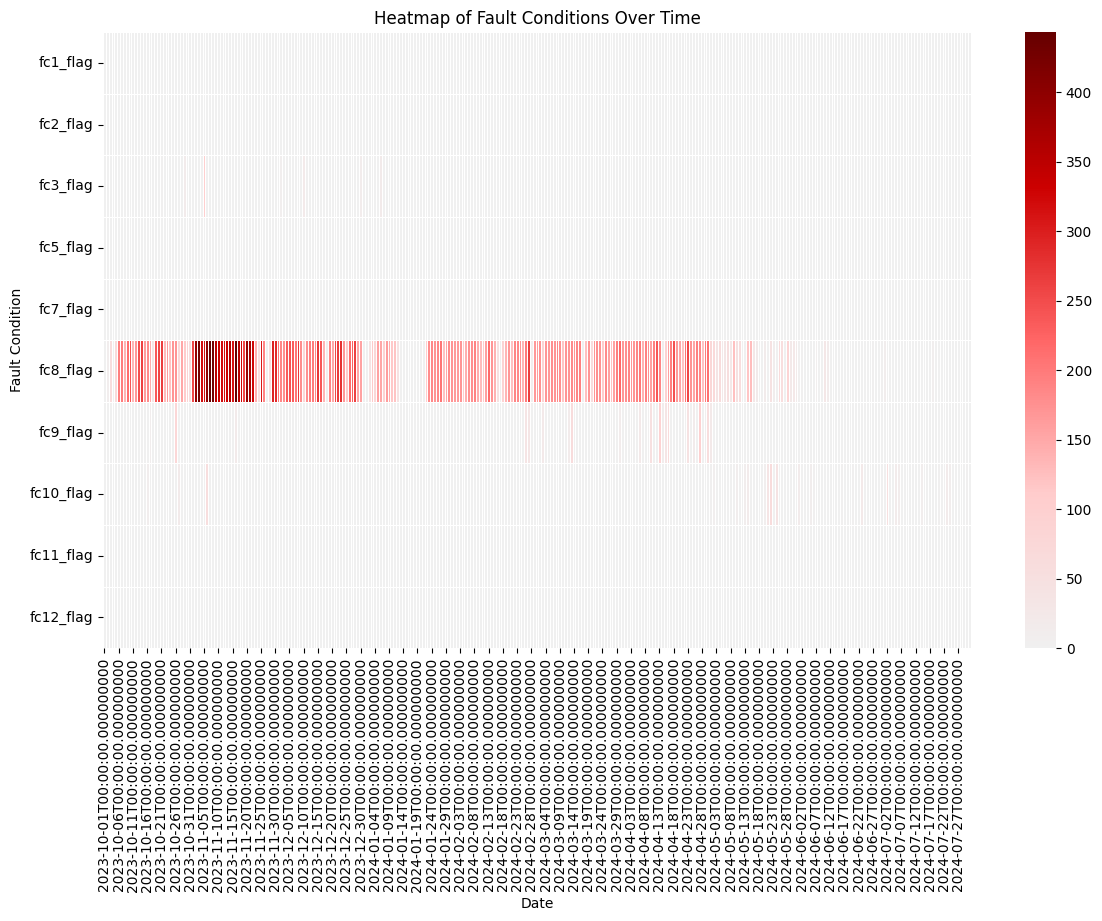

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Create a copy of df_combined
df_combined_copy = df_combined.copy()

# Resample the data to daily intervals for a clearer heatmap
df_daily = df_combined_copy.resample('D').sum()

# Select only the fault sum columns
fault_columns = ['fc1_flag', 'fc2_flag', 'fc3_flag', 'fc5_flag', 'fc7_flag',
                'fc8_flag', 'fc9_flag', 'fc10_flag', 'fc11_flag', 'fc12_flag'] #, 'fc13_flag']

df_faults = df_daily[fault_columns]

# Transpose for better heatmap visualization
df_faults_t = df_faults.T

# Create a custom color map with more distinction for low values
colors = ["#f0f0f0", "#ffcccc", "#ff6666", "#cc0000", "#660000"]  # light gray to dark red
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

# Plot heatmap using seaborn
plt.figure(figsize=(14, 8))
sns.heatmap(df_faults_t, cmap=cmap, cbar=True, linewidths=0.5)

plt.title('Heatmap of Fault Conditions Over Time')
plt.xlabel('Date')
plt.ylabel('Fault Condition')
plt.show()


In [15]:
# Filter the DataFrame for the month of July
df = df.loc["2024-07"]

df

HWR_value  HWS_value  Heat_Calls  Oa_Temp  OaTemp_Enable  \
timestamp                                                                       
2024-07-01 00:00:00      78.61      75.02         0.0    59.48           60.0   
2024-07-01 00:05:00      78.59      74.99         0.0    59.41           60.0   
2024-07-01 00:10:00      78.55      74.94         0.0    59.39           60.0   
2024-07-01 00:15:00      78.51      74.89         0.0    59.29           60.0   
2024-07-01 00:20:00      78.48      74.84         0.0    59.24           60.0   
...                        ...        ...         ...      ...            ...   
2024-07-31 23:35:00      76.90      75.63         0.0    79.55           60.0   
2024-07-31 23:40:00      76.92      75.64         0.0    79.34           60.0   
2024-07-31 23:45:00      76.92      75.65         0.0    79.34           60.0   
2024-07-31 23:50:00      76.93      75.65         0.0    79.30           60.0   
2024-07-31 23:55:00      76.95      75.65         0.0    79.05           60.0   

                     CWR_Temp  CWS_Temp  CWS_Freeze_SPt  CW_Valve  HW_Valve  \
timestamp                                                                     
2024-07-01 00:00:00     55.02     52.64             5.0       0.0       0.0   
2024-07-01 00:05:00     55.11     52.71             5.0       0.0       0.0   
2024-07-01 00:10:00     55.18     52.78             5.0       0.0       0.0   
2024-07-01 00:15:00     55.28     52.86             5.0       0.0       0.0   
2024-07-01 00:20:00     55.36     52.95             5.0       0.0       0.0   
...                       ...       ...             ...       ...       ...   
2024-07-31 23:35:00     54.38     51.72             5.0       0.0       0.0   
2024-07-31 23:40:00     54.72     52.00             5.0       0.0       0.0   
2024-07-31 23:45:00     54.72     52.00             5.0       0.0       0.0   
2024-07-31 23:50:00     54.91     52.14             5.0       0.0       0.0   
2024-07-31 23:55:00     55.06     52.23             5.0       0.0       0.0   

                     ...  MA_Temp  EffSetpoint  EaDamper  SpaceTemp  RA_CO2  \
timestamp            ...                                                      
2024-07-01 00:00:00  ...    72.27         76.0       0.0      69.57  420.86   
2024-07-01 00:05:00  ...    72.27         76.0       0.0      69.57  420.86   
2024-07-01 00:10:00  ...    72.27         76.0       0.0      69.57  420.74   
2024-07-01 00:15:00  ...    72.27         76.0       0.0      69.55  420.76   
2024-07-01 00:20:00  ...    72.27         76.0       0.0      69.54  422.69   
...                  ...      ...          ...       ...        ...     ...   
2024-07-31 23:35:00  ...    76.68         76.0       0.0      72.15  566.66   
2024-07-31 23:40:00  ...    76.68         76.0       0.0      72.16  580.28   
2024-07-31 23:45:00  ...    76.73         76.0       0.0      72.16  591.89   
2024-07-31 23:50:00  ...    76.79         76.0       0.0      72.17  599.25   
2024-07-31 23:55:00  ...    76.84         76.0       0.0      72.17  605.54   

                     RA_Temp  VAV2_6_SpaceTemp  VAV2_7_SpaceTemp  \
timestamp                                                          
2024-07-01 00:00:00    71.62             71.62             72.04   
2024-07-01 00:05:00    71.62             71.60             72.02   
2024-07-01 00:10:00    71.61             71.58             71.99   
2024-07-01 00:15:00    71.56             71.58             71.95   
2024-07-01 00:20:00    71.51             71.55             71.93   
...                      ...               ...               ...   
2024-07-31 23:35:00    77.85             74.42             75.01   
2024-07-31 23:40:00    77.76             74.42             75.01   
2024-07-31 23:45:00    77.72             74.40             74.99   
2024-07-31 23:50:00    77.70             74.37             74.96   
2024-07-31 23:55:00    77.65             74.37             74.96   

                     VAV3_

Fault Condition 1: Duct static too low at fan at full speed


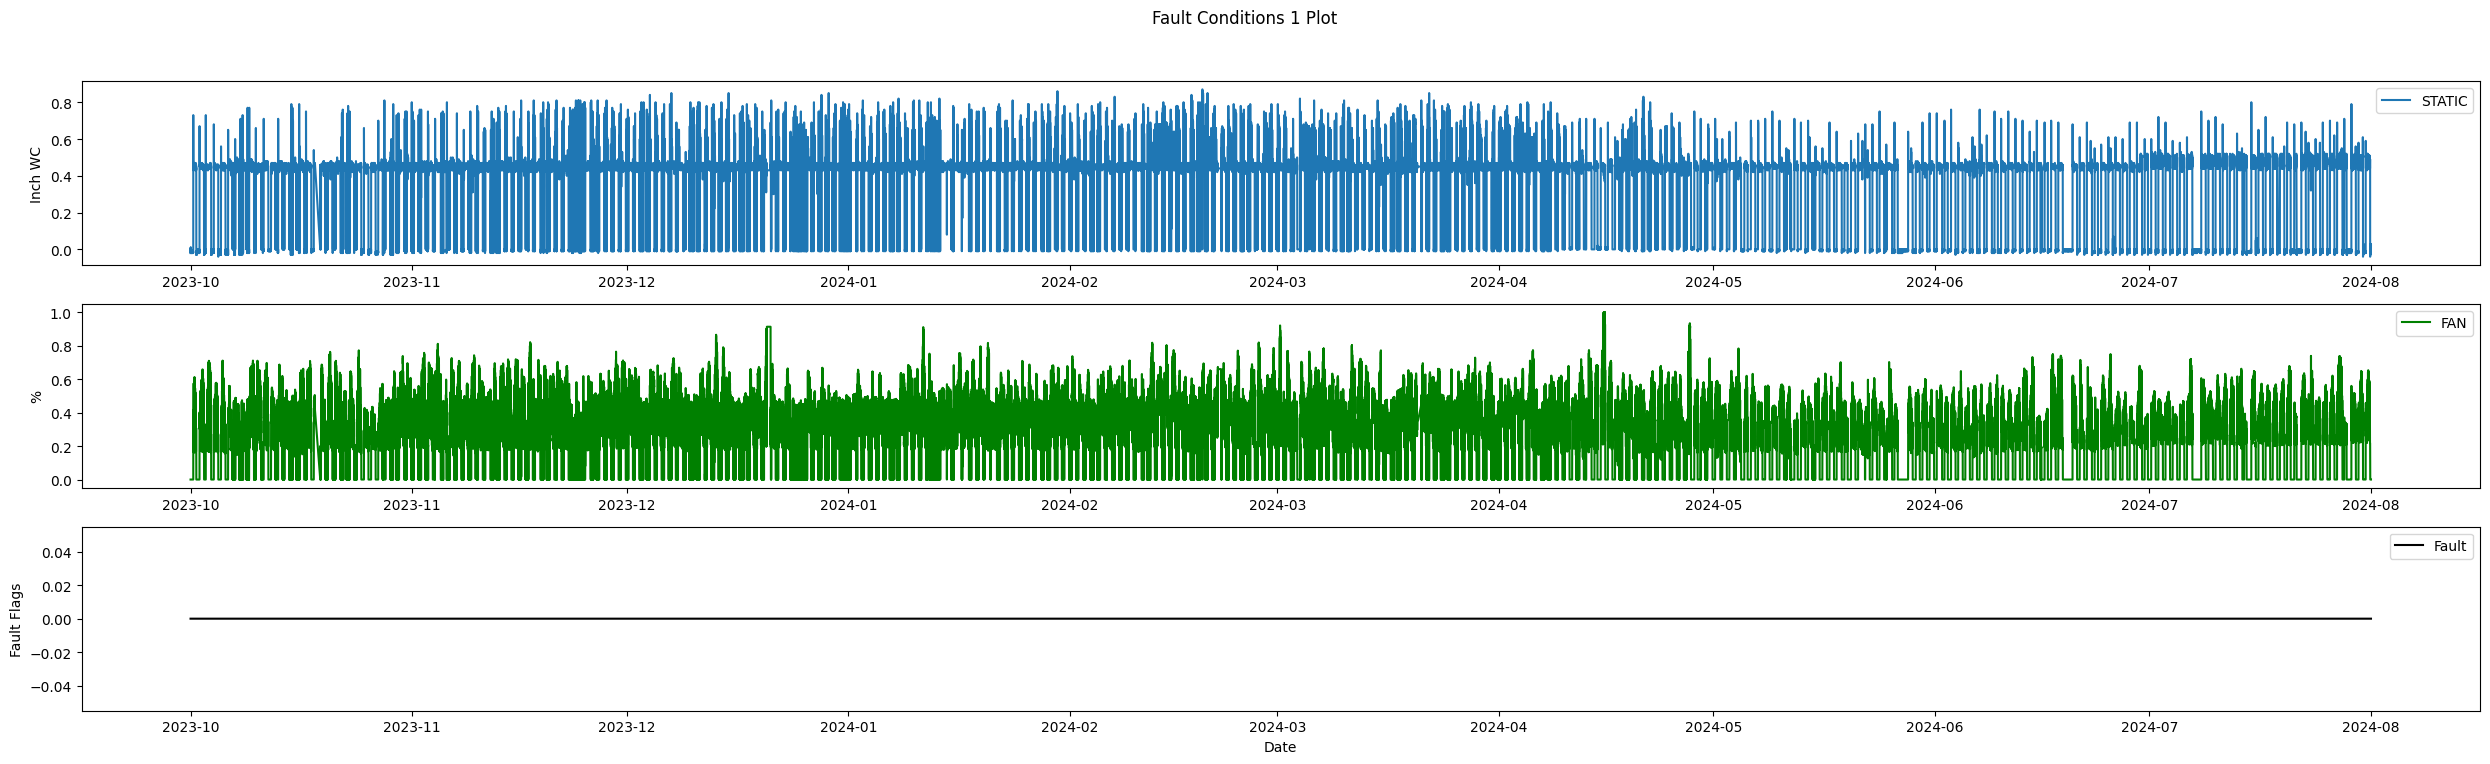

total days: 305.0
total hours: 7320
hours fc1 mode: 0
percent true: 0.0
percent false: 100.0
flag true duct static: nan
flag true duct static spt: nan
hours motor runtime: 5484.23
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [16]:
from open_fdd.air_handling_unit.reports.report_fc1 import FaultCodeOneReport

# Create an instance of FaultCodeFourReport
fc1_report = FaultCodeOneReport(config_dict)
fc1_report.display_report_in_ipython(df_combined)

Fault Condition 2: Mix temperature too low; should be between outside and return air


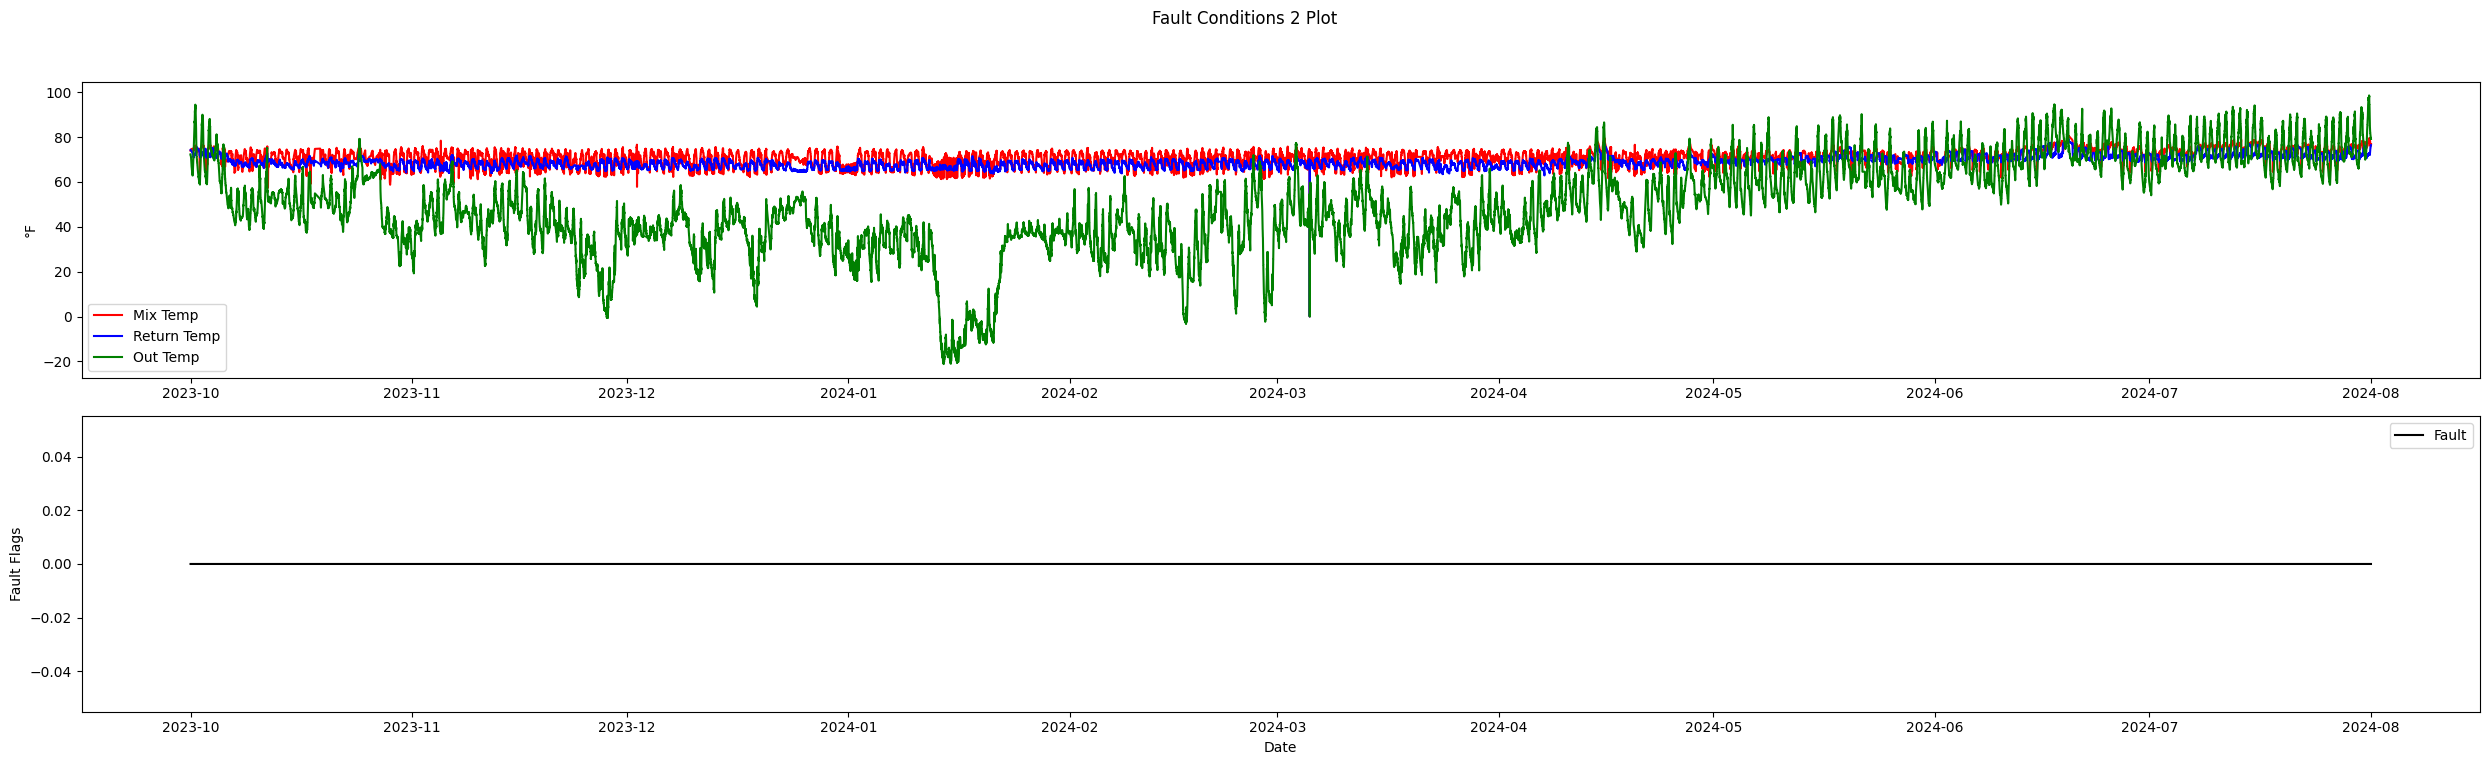

total days: 305.0
total hours: 7320
hours fc2 mode: 0
percent true: 0.0
percent false: 100.0
flag true mat: nan
flag true oat: nan
flag true rat: nan
hours motor runtime: 5484.23
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [17]:
from open_fdd.air_handling_unit.reports.report_fc2 import FaultCodeTwoReport

# Create an instance of FaultCodeFourReport
fc2_report = FaultCodeTwoReport(config_dict)
fc2_report.display_report_in_ipython(df_combined)

Fault Condition 3: Mix temperature too high; should be between outside and return air


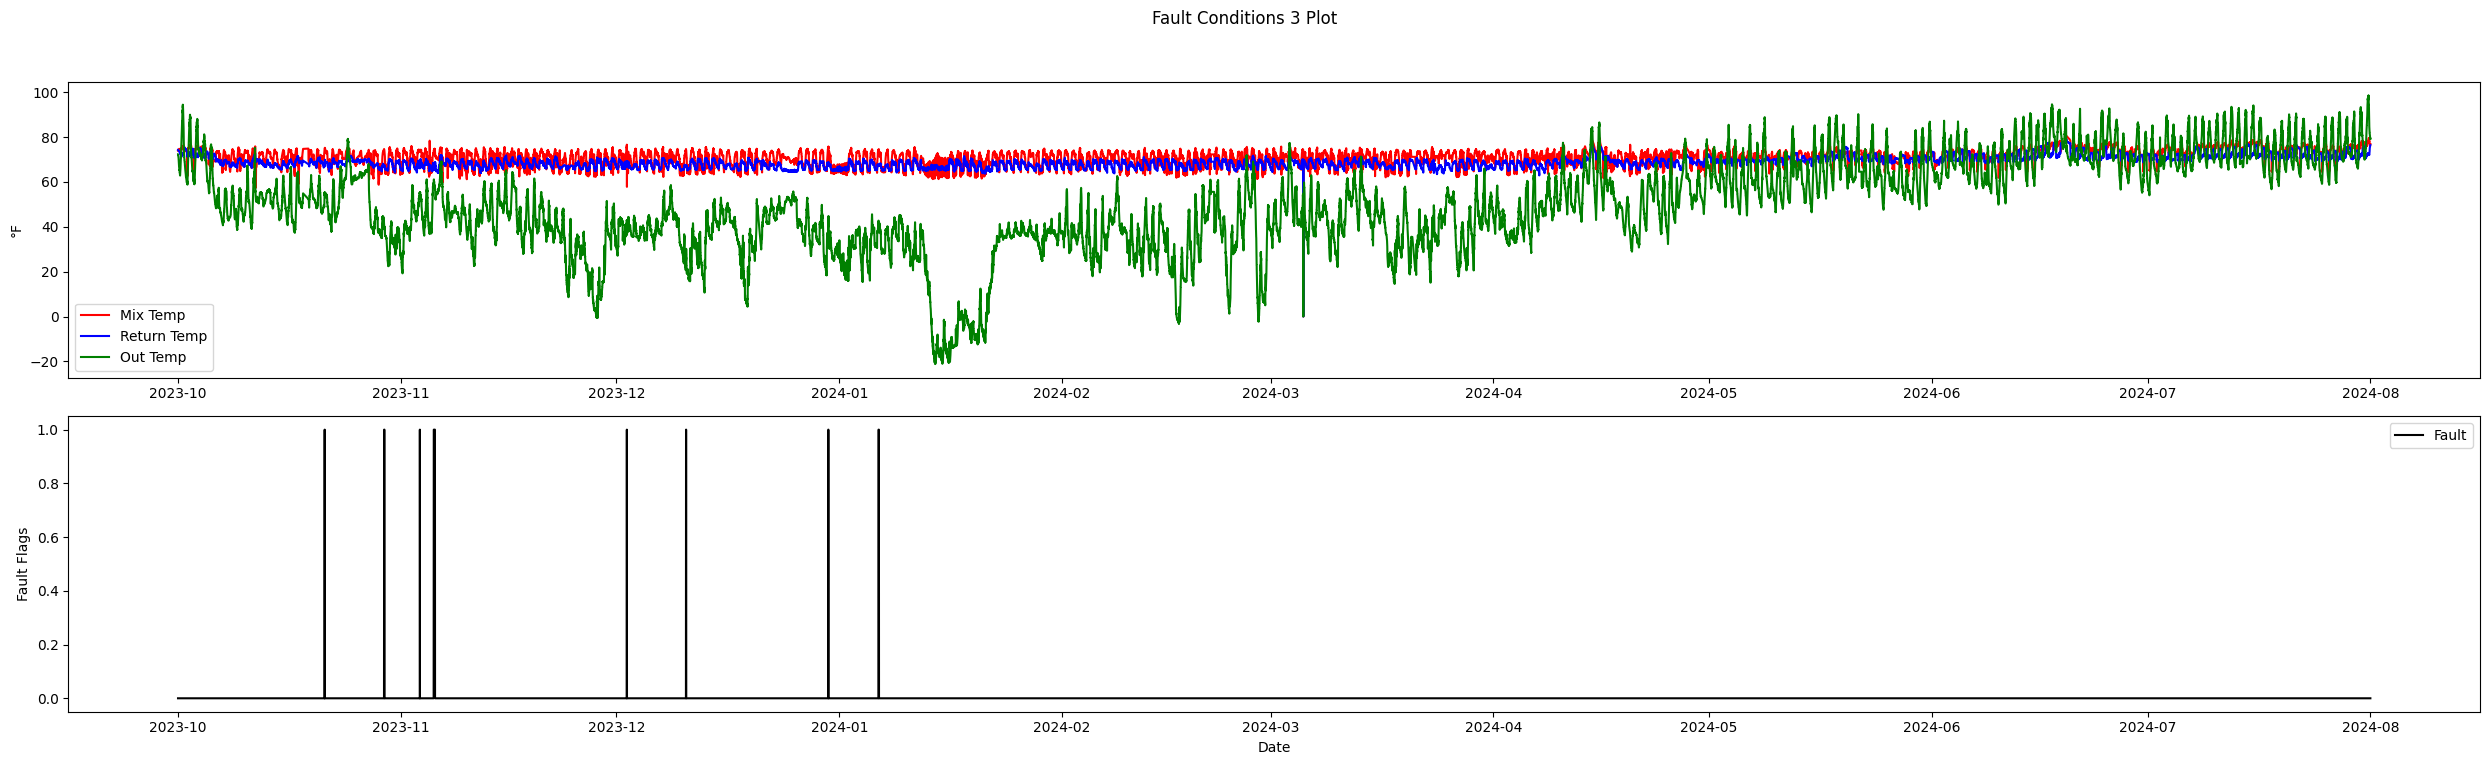

total days: 305.0
total hours: 7320
hours fc3 mode: 9
percent true: 0.18
percent false: 99.82
flag true mat: 74.53
flag true oat: 49.73
flag true rat: 66.61
hours motor runtime: 5484.23
Fault Flag Count:  1


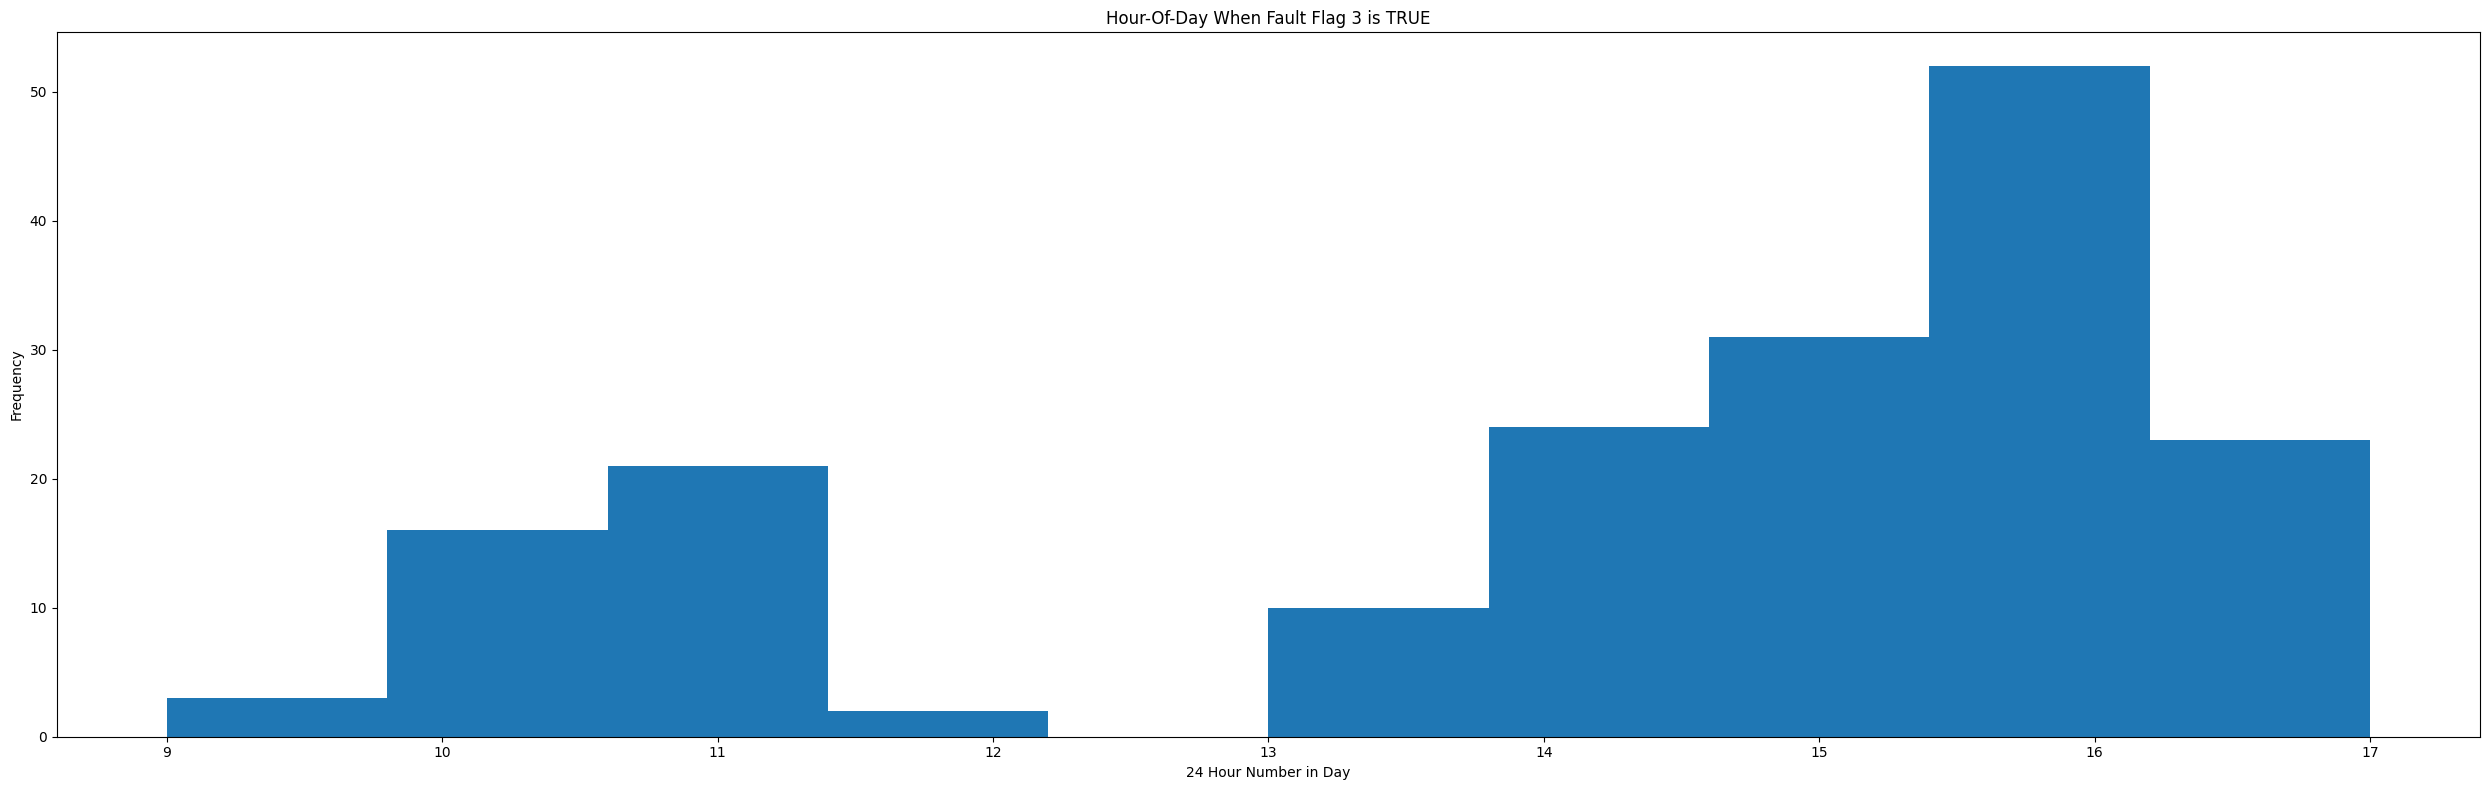

Mix Air Temp Mean When In Fault:  74.53
Outside Air Temp Mean When In Fault:  49.73
Return Temp Mean When In Fault:  66.61
The percent True metric that represents the amount of time for when the fault flag is True is low, indicating the system is likely functioning correctly.


In [18]:
from open_fdd.air_handling_unit.reports.report_fc3 import FaultCodeThreeReport

# Create an instance of FaultCodeFourReport
fc3_report = FaultCodeThreeReport(config_dict)
fc3_report.display_report_in_ipython(df_combined)


Fault Condition 4: Hunting too many OS state changes


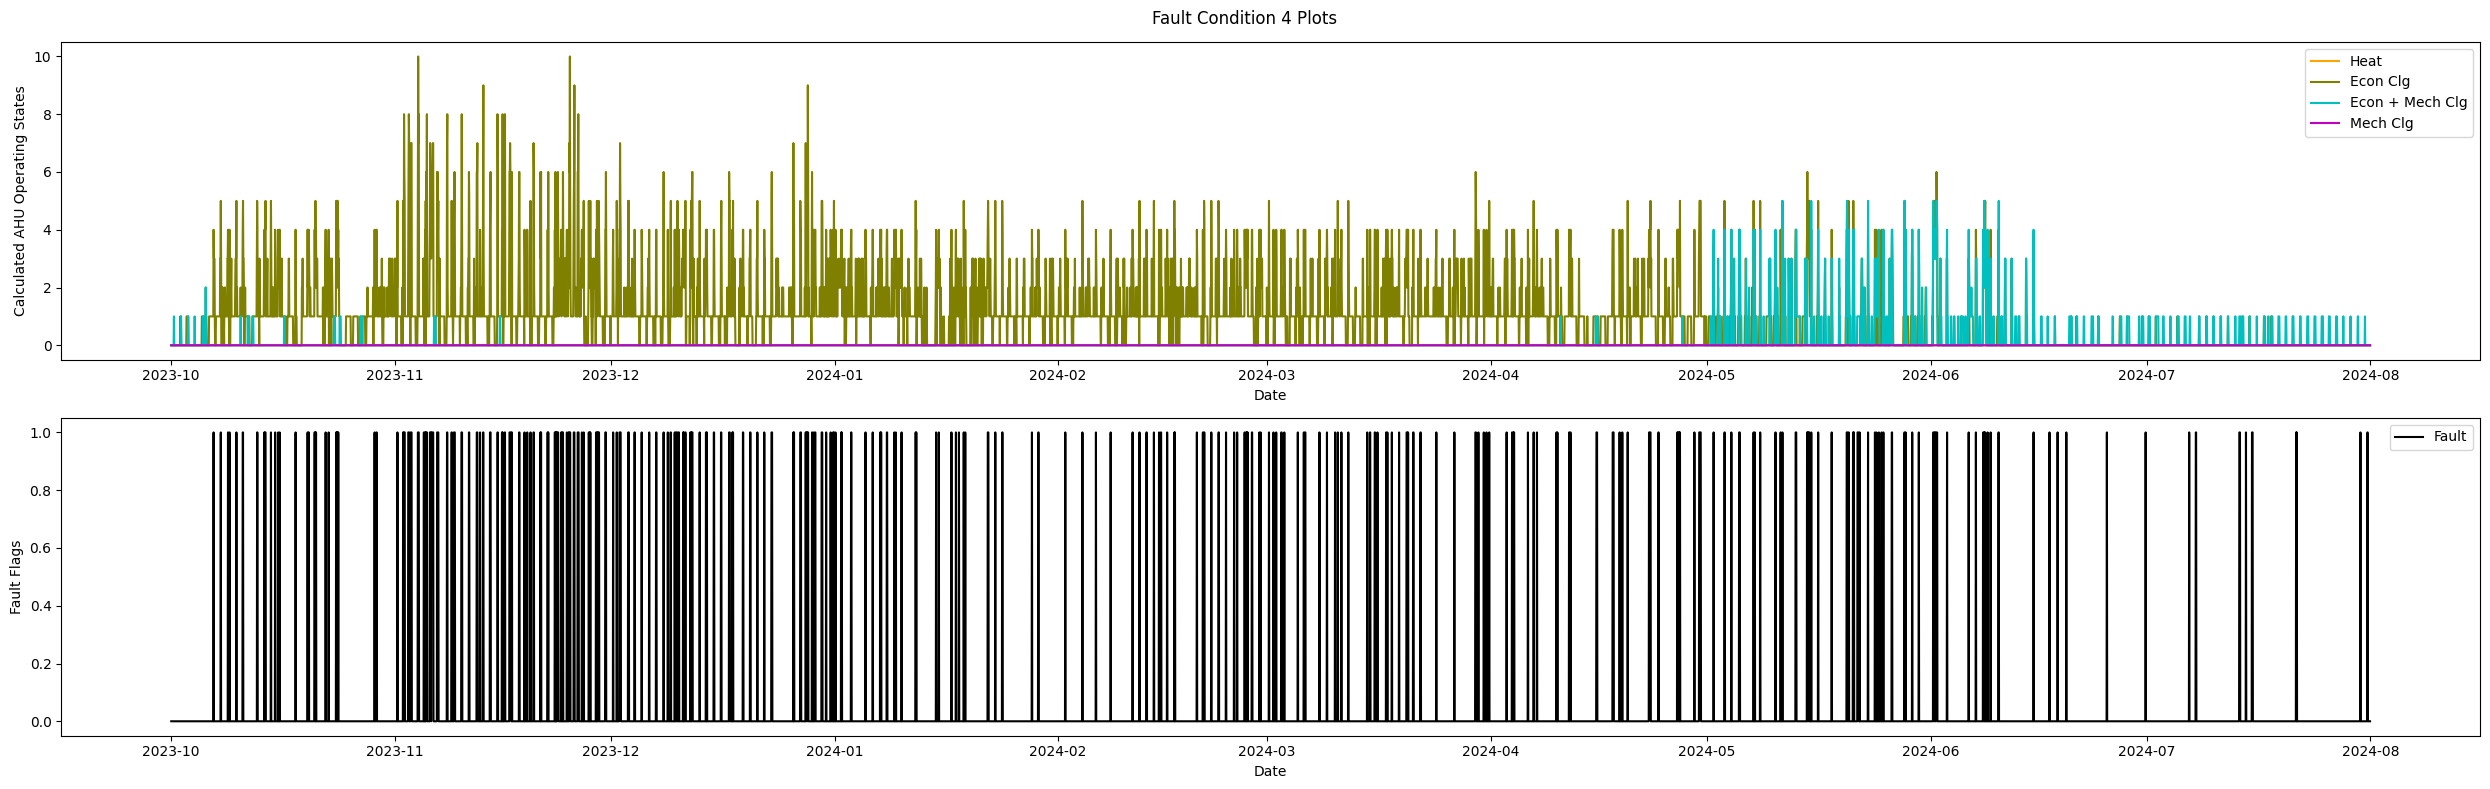

total days: 304.96
total hours: 7319
hours in fault: 486
percent of time in fault: 6.64
percent of time not in fault: 93.36
percent of time AHU in mech clg mode: 0.0
percent of time AHU in econ plus mech clg mode: 11.57
percent of time AHU in econ free clg mode: 107.13
percent of time AHU in heating mode: 0.0
total hours heating mode: 0.0
total hours econ mode: 7842.0
total hours econ mech clg mode: 847.0
total hours mech clg mode: 0.0
Fault Flag Count:  1

Time-of-day Histogram Data
timestamp
2023-10-06 21:00:00    21.0
2023-10-07 21:00:00    21.0
2023-10-08 21:00:00    21.0
2023-10-09 02:00:00     2.0
2023-10-10 01:00:00     1.0
                       ... 
2024-07-21 17:00:00    17.0
2024-07-21 19:00:00    19.0
2024-07-30 15:00:00    15.0
2024-07-31 14:00:00    14.0
2024-07-31 15:00:00    15.0
Name: hour_of_the_day, Length: 486, dtype: float64



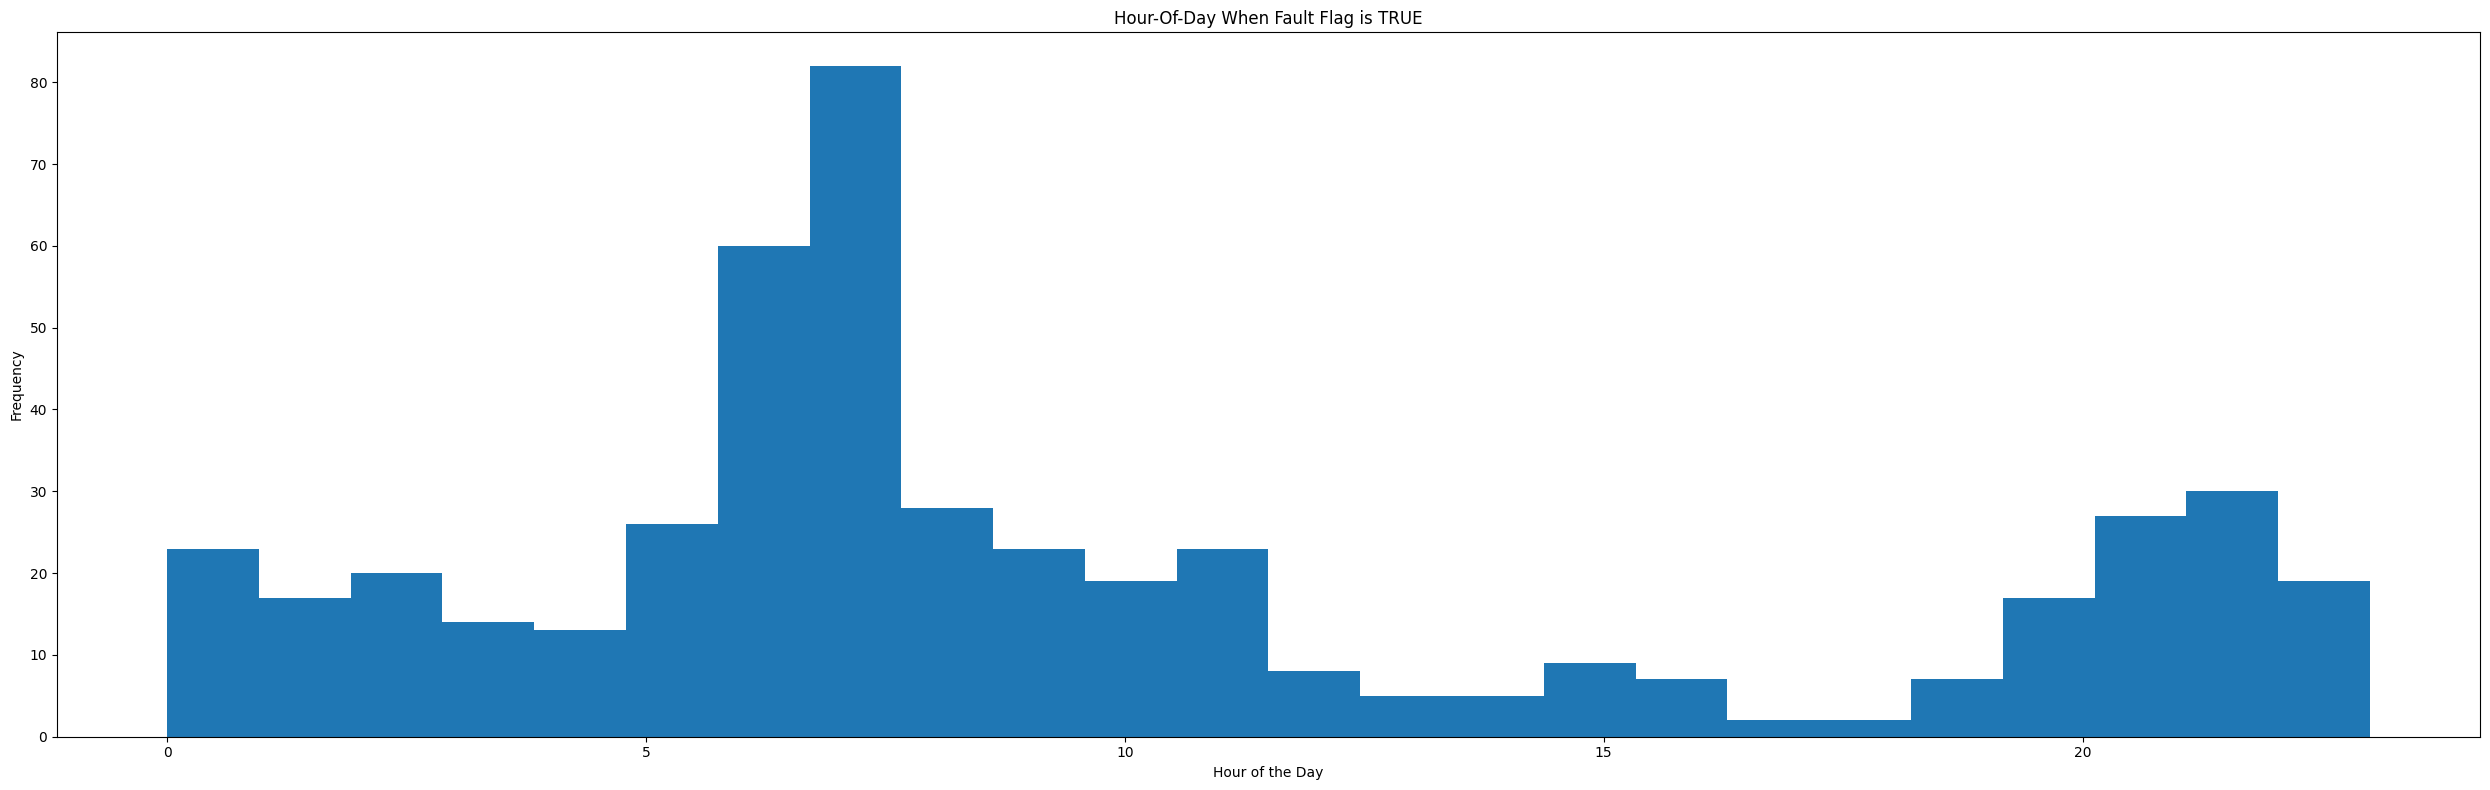

In [19]:

from open_fdd.air_handling_unit.reports.report_fc4 import FaultCodeFourReport

# Create an instance of FaultCodeFourReport
fc4_report = FaultCodeFourReport(config_dict)
fc4_report.display_report_in_ipython(df_fc4)

Fault Condition 5: Supply air temperature too low; should be higher than mix air


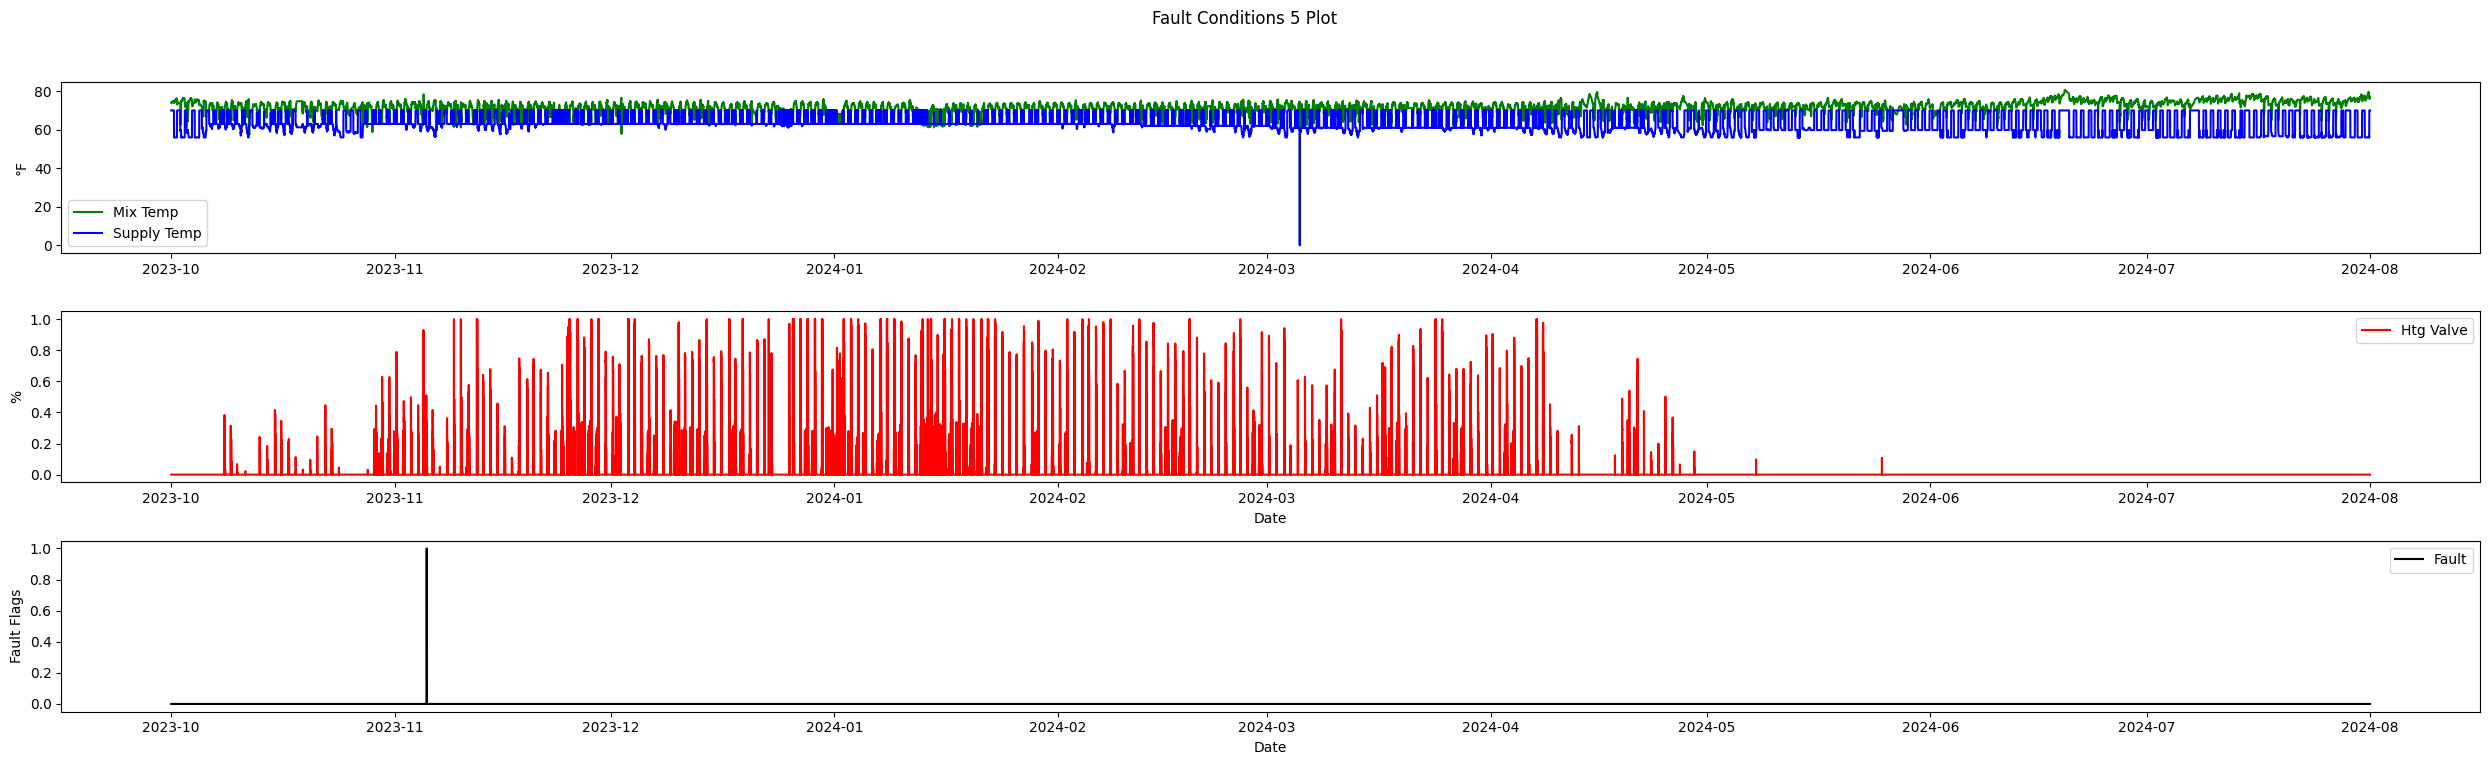

total days: 305.0
total hours: 7320
hours fc5 mode: 0
percent true: 0.0
percent false: 100.0
flag true mat: 71.5
flag true sat: 61.5
hours motor runtime: 5484.23
Fault Flag Count:  1


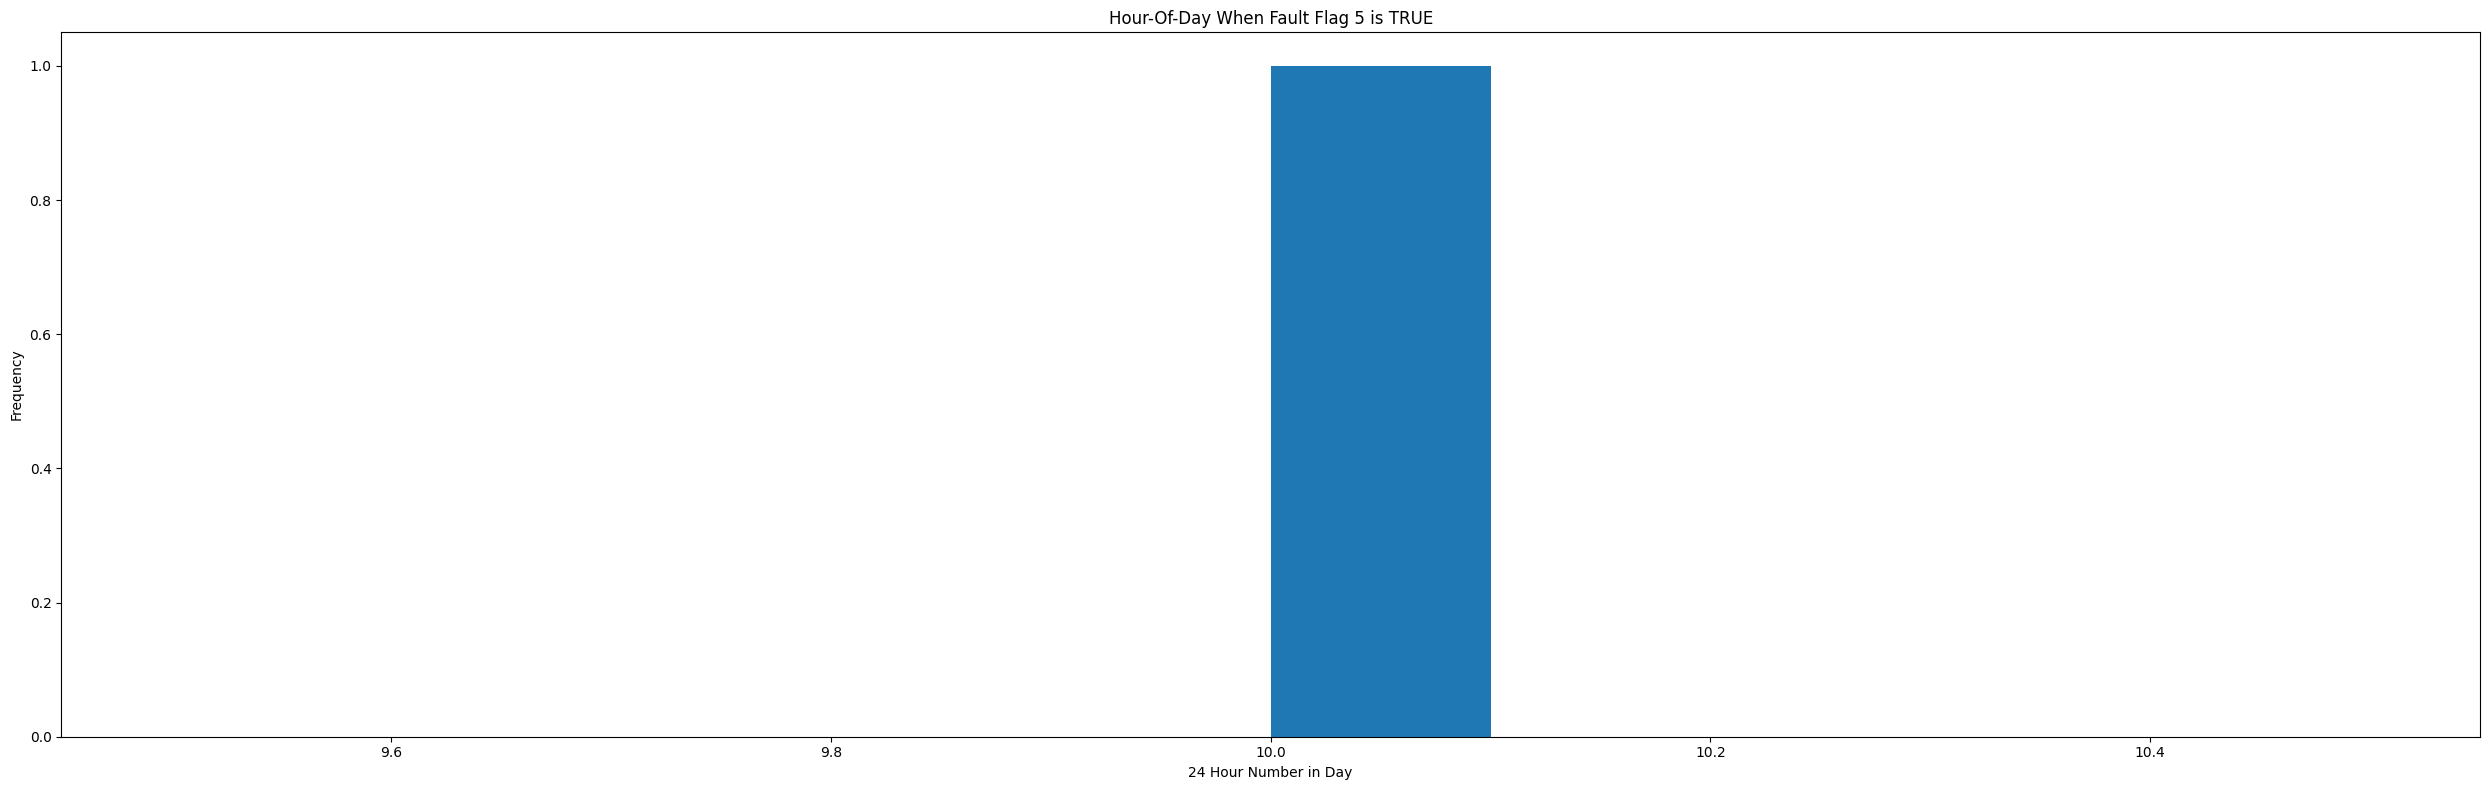

Mix Air Temp Mean When In Fault:  71.5
Supply Air Temp Mean When In Fault:  61.5
The percent True metric that represents the amount of time for when the fault flag is True is low indicating the AHU temperature sensors are within calibration.


In [20]:
from open_fdd.air_handling_unit.reports.report_fc5 import FaultCodeFiveReport

# Create an instance of FaultCodeFourReport
fc5_report = FaultCodeFiveReport(config_dict)
fc5_report.display_report_in_ipython(df_combined)

Fault Condition 7: Supply air temperature too low in full heating mode


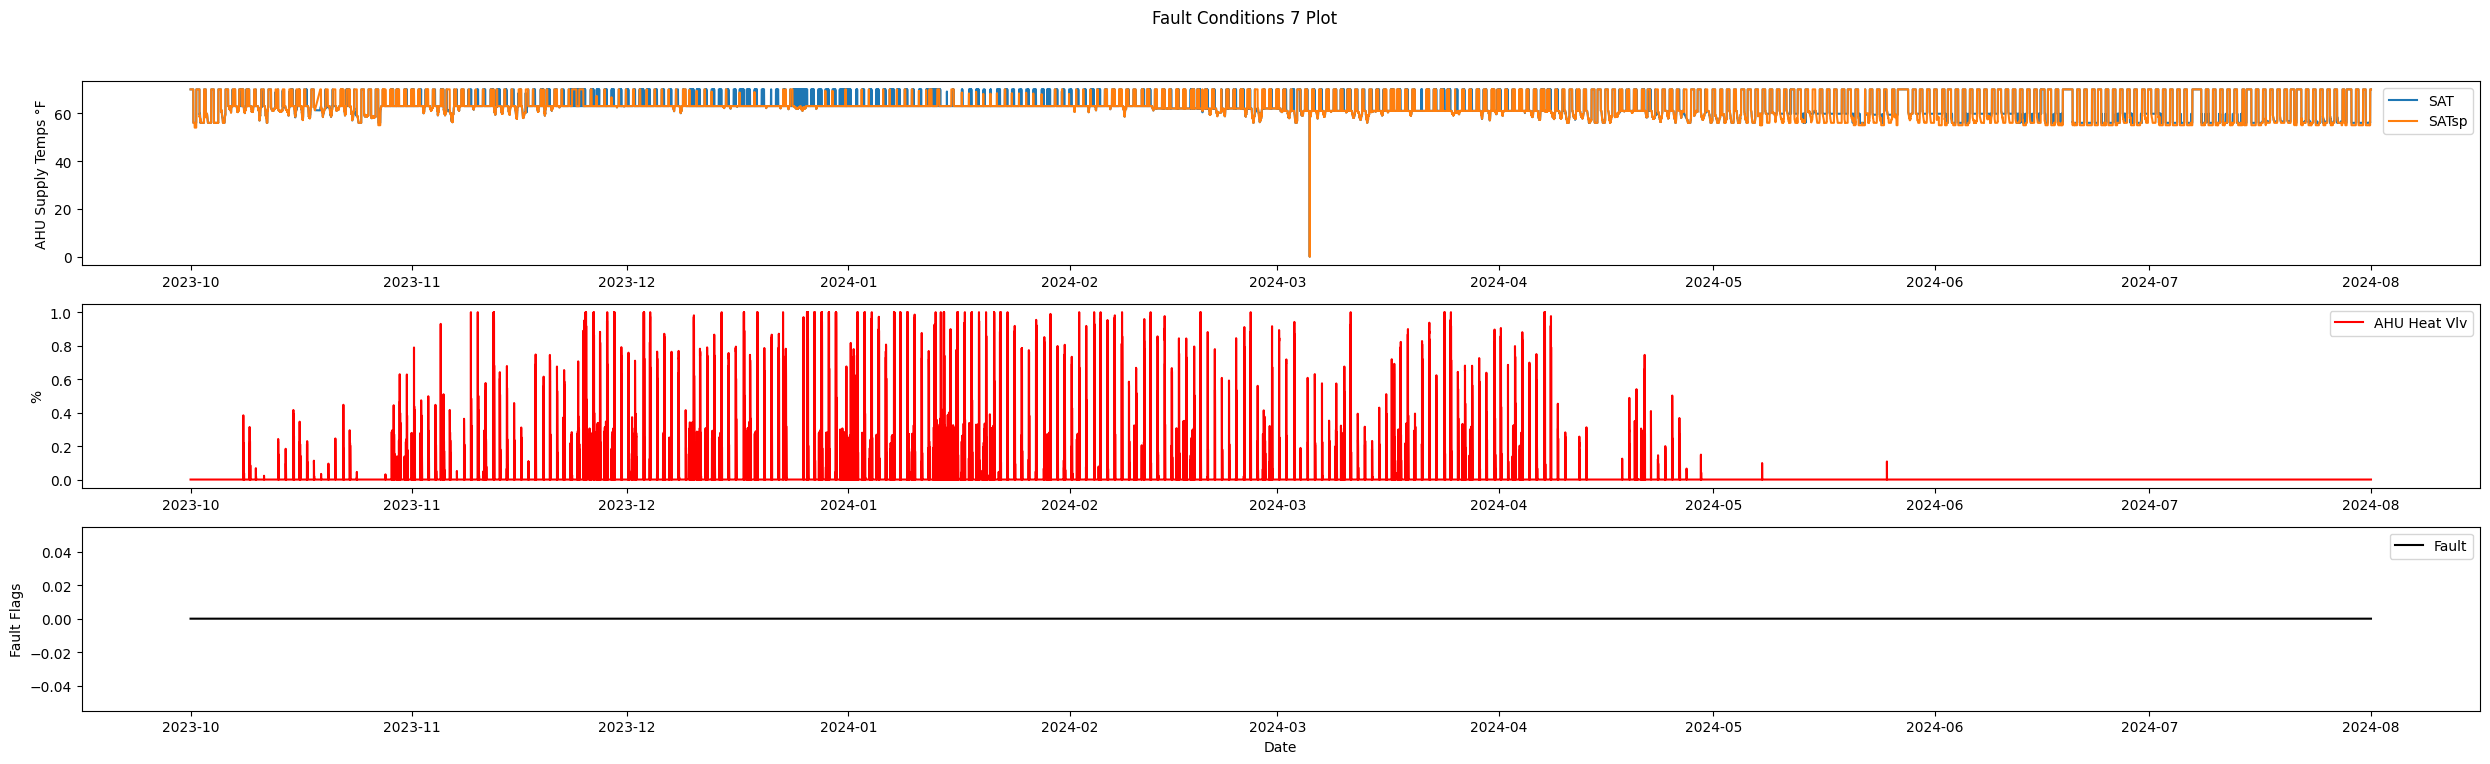

total days: 305.0
total hours: 7320
hours fc7 mode: 0
percent true: 0.0
percent false: 100.0
flag true satsp: nan
flag true sat: nan
hours motor runtime: 5484.23
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [21]:
from open_fdd.air_handling_unit.reports.report_fc7 import FaultCodeSevenReport

# Create an instance of FaultCodeFourReport
fc7_report = FaultCodeSevenReport(config_dict)
fc7_report.display_report_in_ipython(df_combined)


Fault Condition 8: Supply air temperature and mix air temperature should be approximately equal in economizer mode


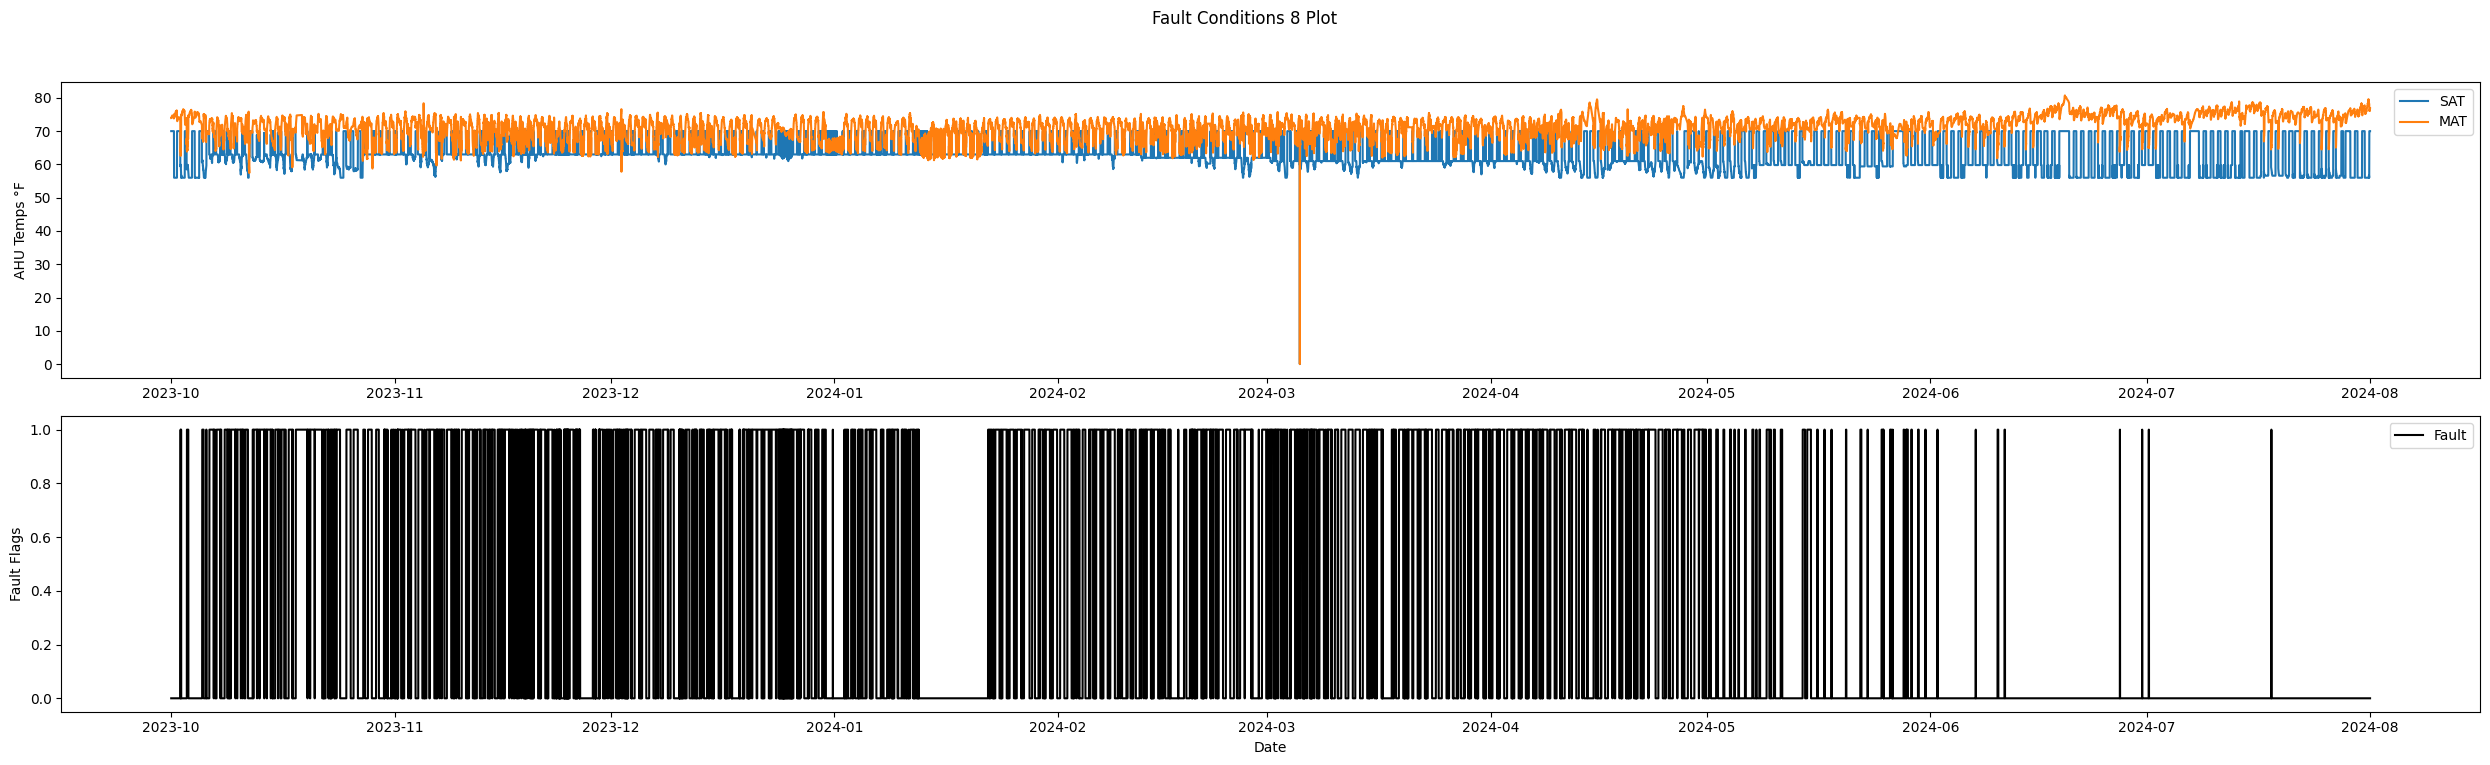

total days: 305.0
total hours: 7320
hours fc8 mode: 2692
percent true: 38.08
percent false: 61.92
flag true mat: 71.61
flag true sat: 61.66
hours motor runtime: 5484.23
Fault Flag Count:  1


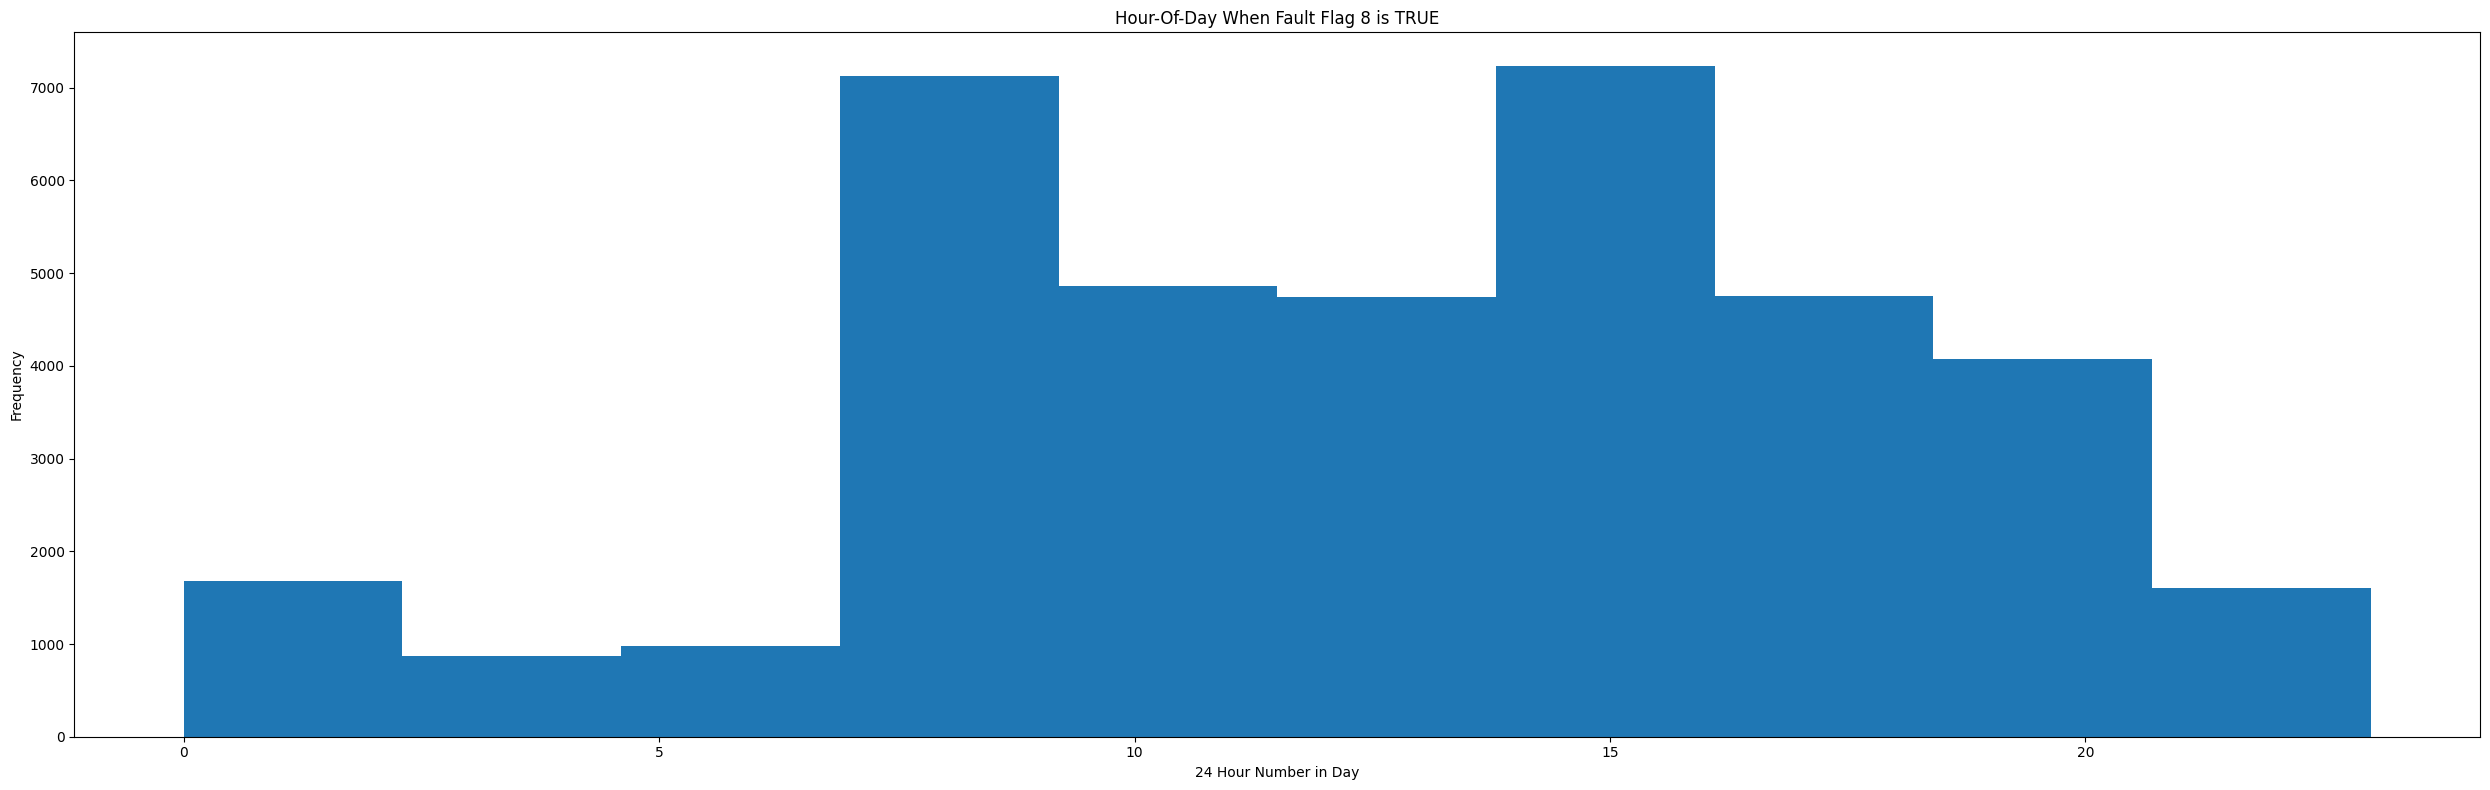

Mix Air Temp Mean When In Fault:  71.61
Supply Air Temp Mean When In Fault:  61.66
The percent True metric that represents the amount of time for when the fault flag is True is high indicating temperature sensor error or the heating/cooling coils are leaking, potentially creating simultaneous heating/cooling which can be an energy penalty for running the AHU in this fashion. Verify AHU mix/supply temperature sensor calibration in addition to a potential mechanical issue of a leaking valve. A leaking valve can be troubleshot by isolating the valve closed by manual shut-off valves where piping lines enter the AHU coil and then verifying any changes in the AHU discharge air temperature.


In [22]:
from open_fdd.air_handling_unit.reports.report_fc8 import FaultCodeEightReport

# Create an instance of FaultCodeFourReport
fc8_report = FaultCodeEightReport(config_dict)
fc8_report.display_report_in_ipython(df_combined)

Fault Condition 9: Outside air temperature too high in free cooling without additional mechanical cooling in economizer mode


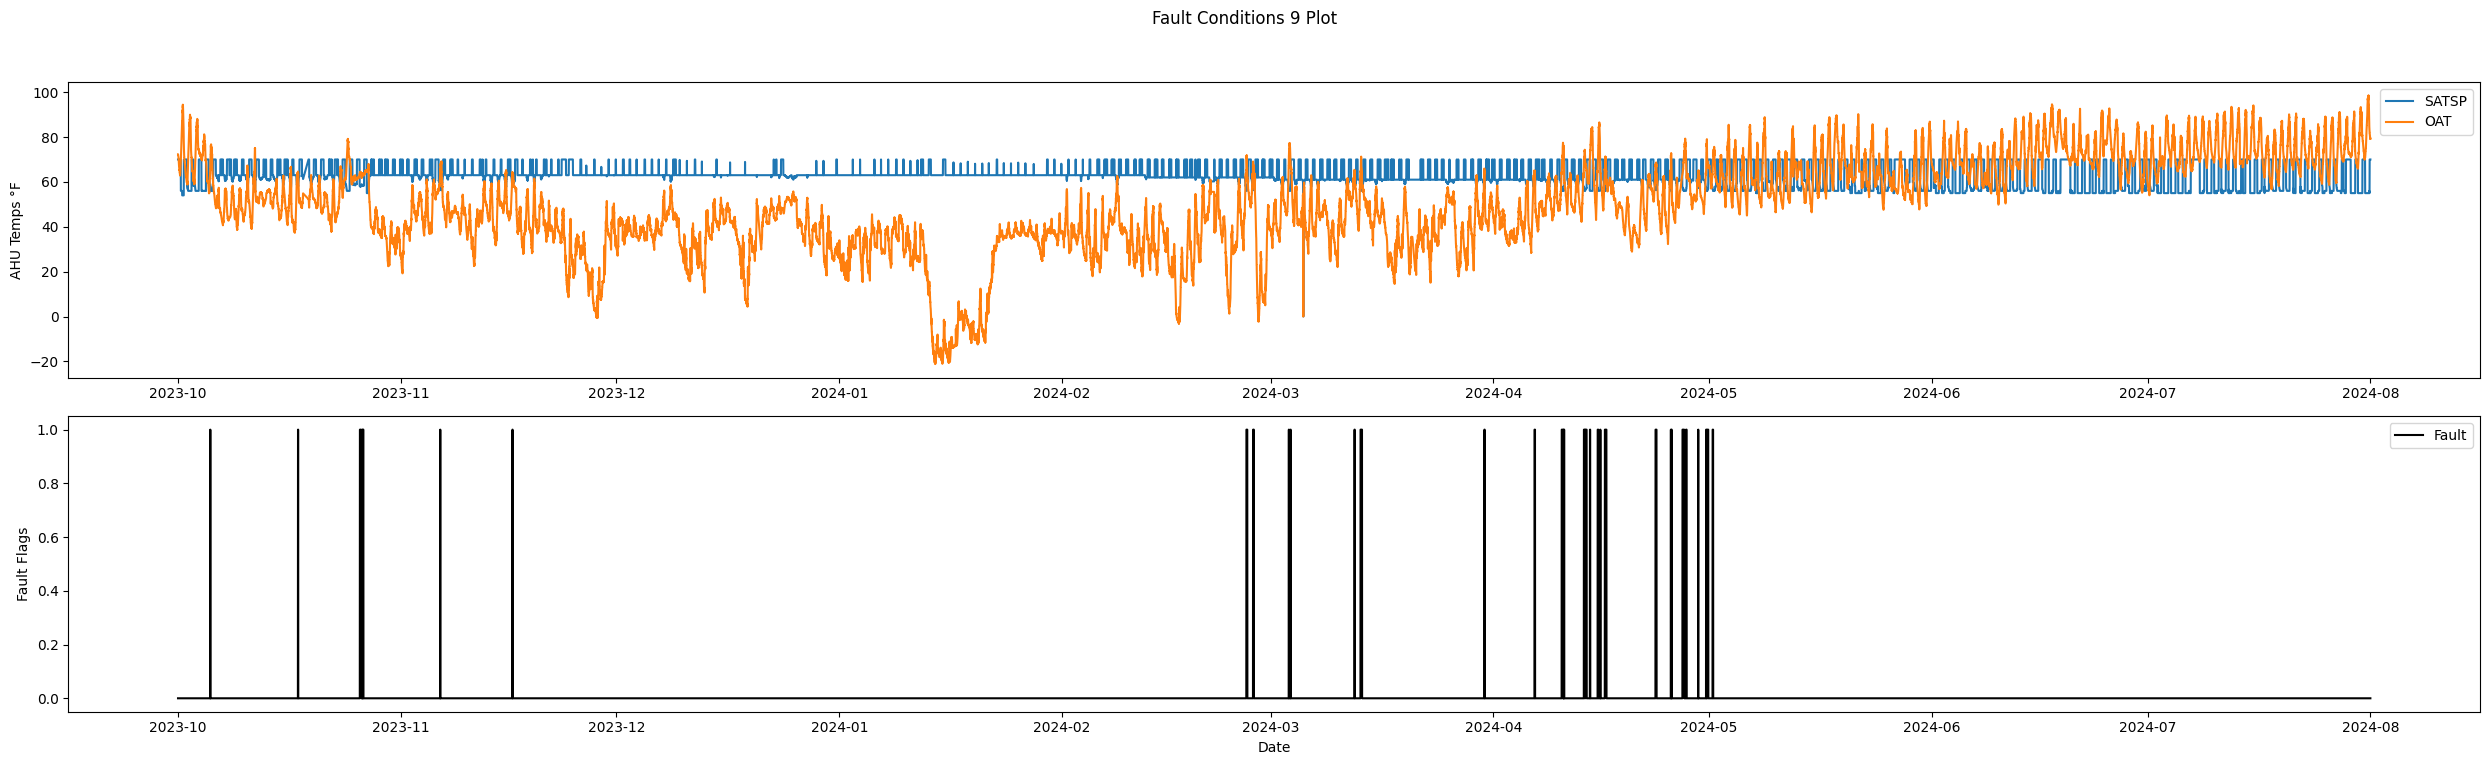

total days: 305.0
total hours: 7320
hours fc9 mode: 67
percent true: 0.82
percent false: 99.18
flag true oat: 66.99
flag true satsp: 56.91
hours motor runtime: 5484.23
Fault Flag Count:  1


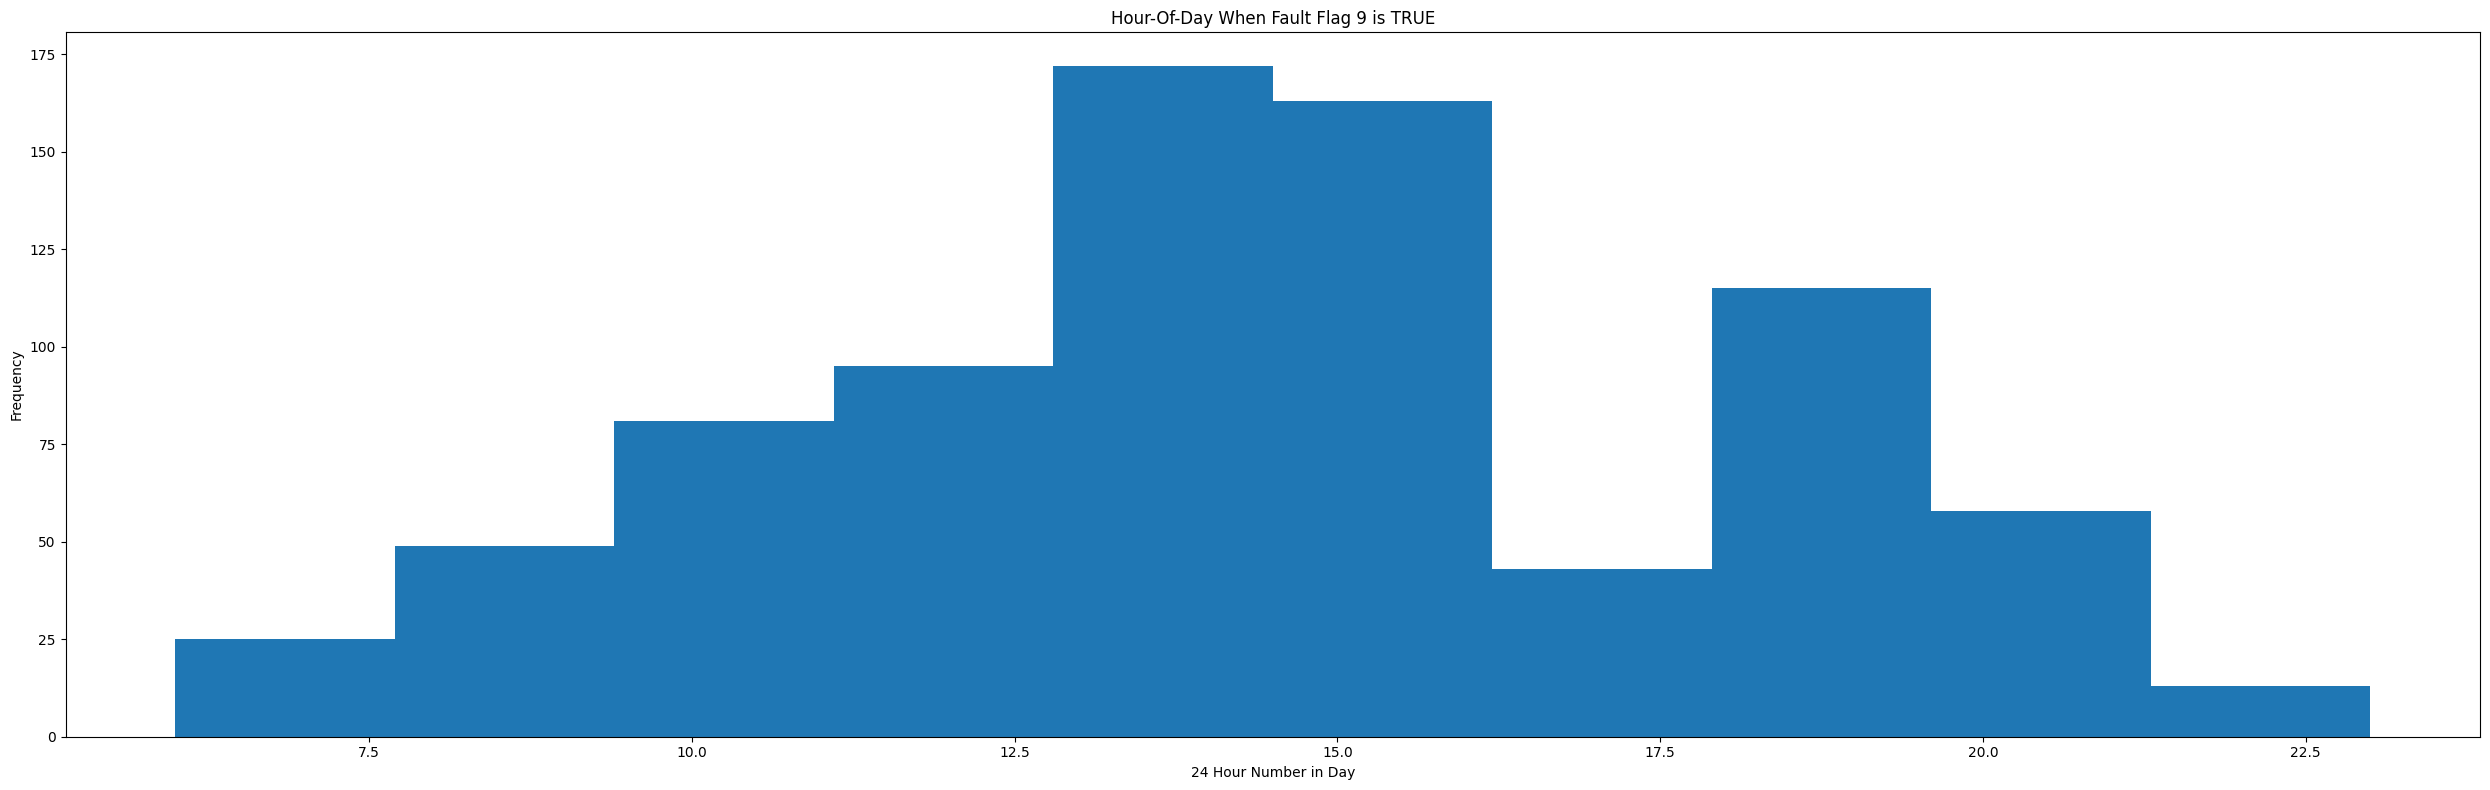

Outside Air Temp Mean When In Fault:  66.99
Supply Air Temp Setpoint Mean When In Fault:  56.91
The percent True metric that represents the amount of time for when the fault flag is True is low indicating the AHU components are within calibration for this fault equation.


In [23]:
from open_fdd.air_handling_unit.reports.report_fc9 import FaultCodeNineReport

# Create an instance of FaultCodeFourReport
fc9_report = FaultCodeNineReport(config_dict)
fc9_report.display_report_in_ipython(df_combined)

Fault Condition 10: Outdoor air temperature and mix air temperature should be approximately equal in economizer plus mech cooling mode


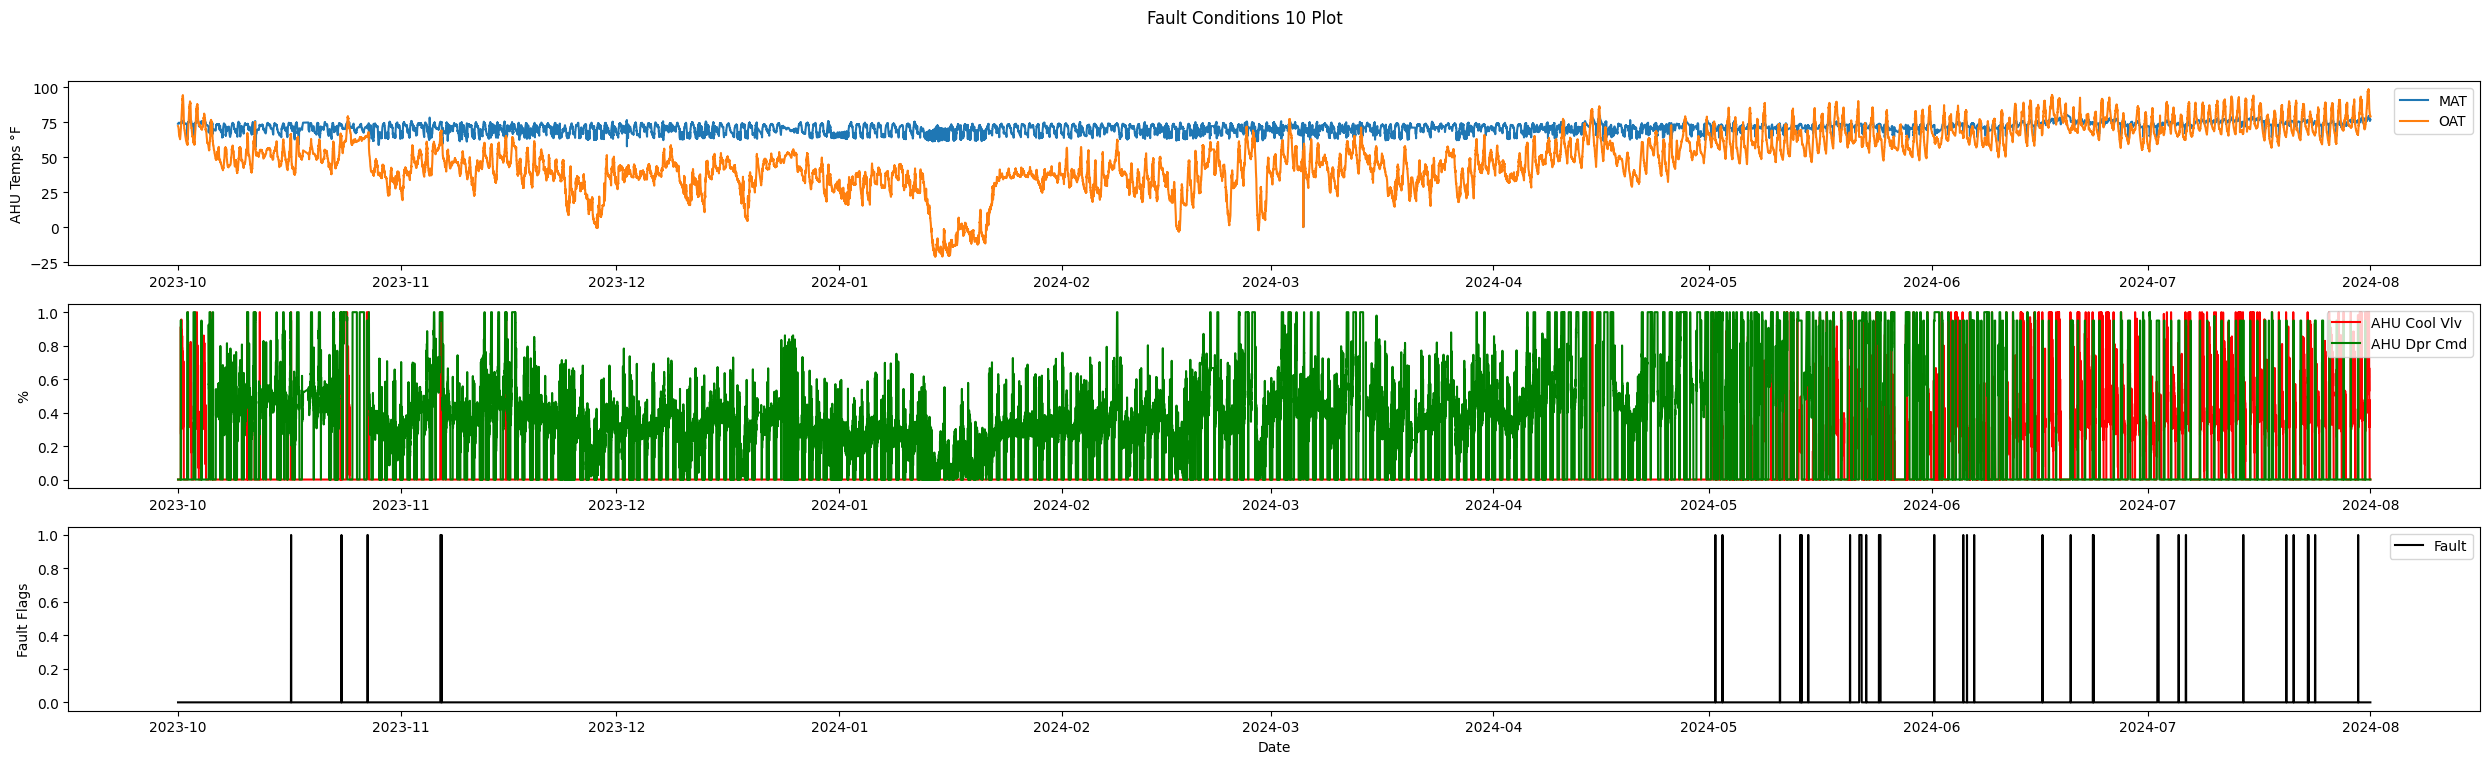

total days: 305.0
total hours: 7320
hours fc10 mode: 37
percent true: 0.47
percent false: 99.53
flag true oat: 64.88
flag true mat: 73.76
hours motor runtime: 5484.23
Fault Flag Count:  1


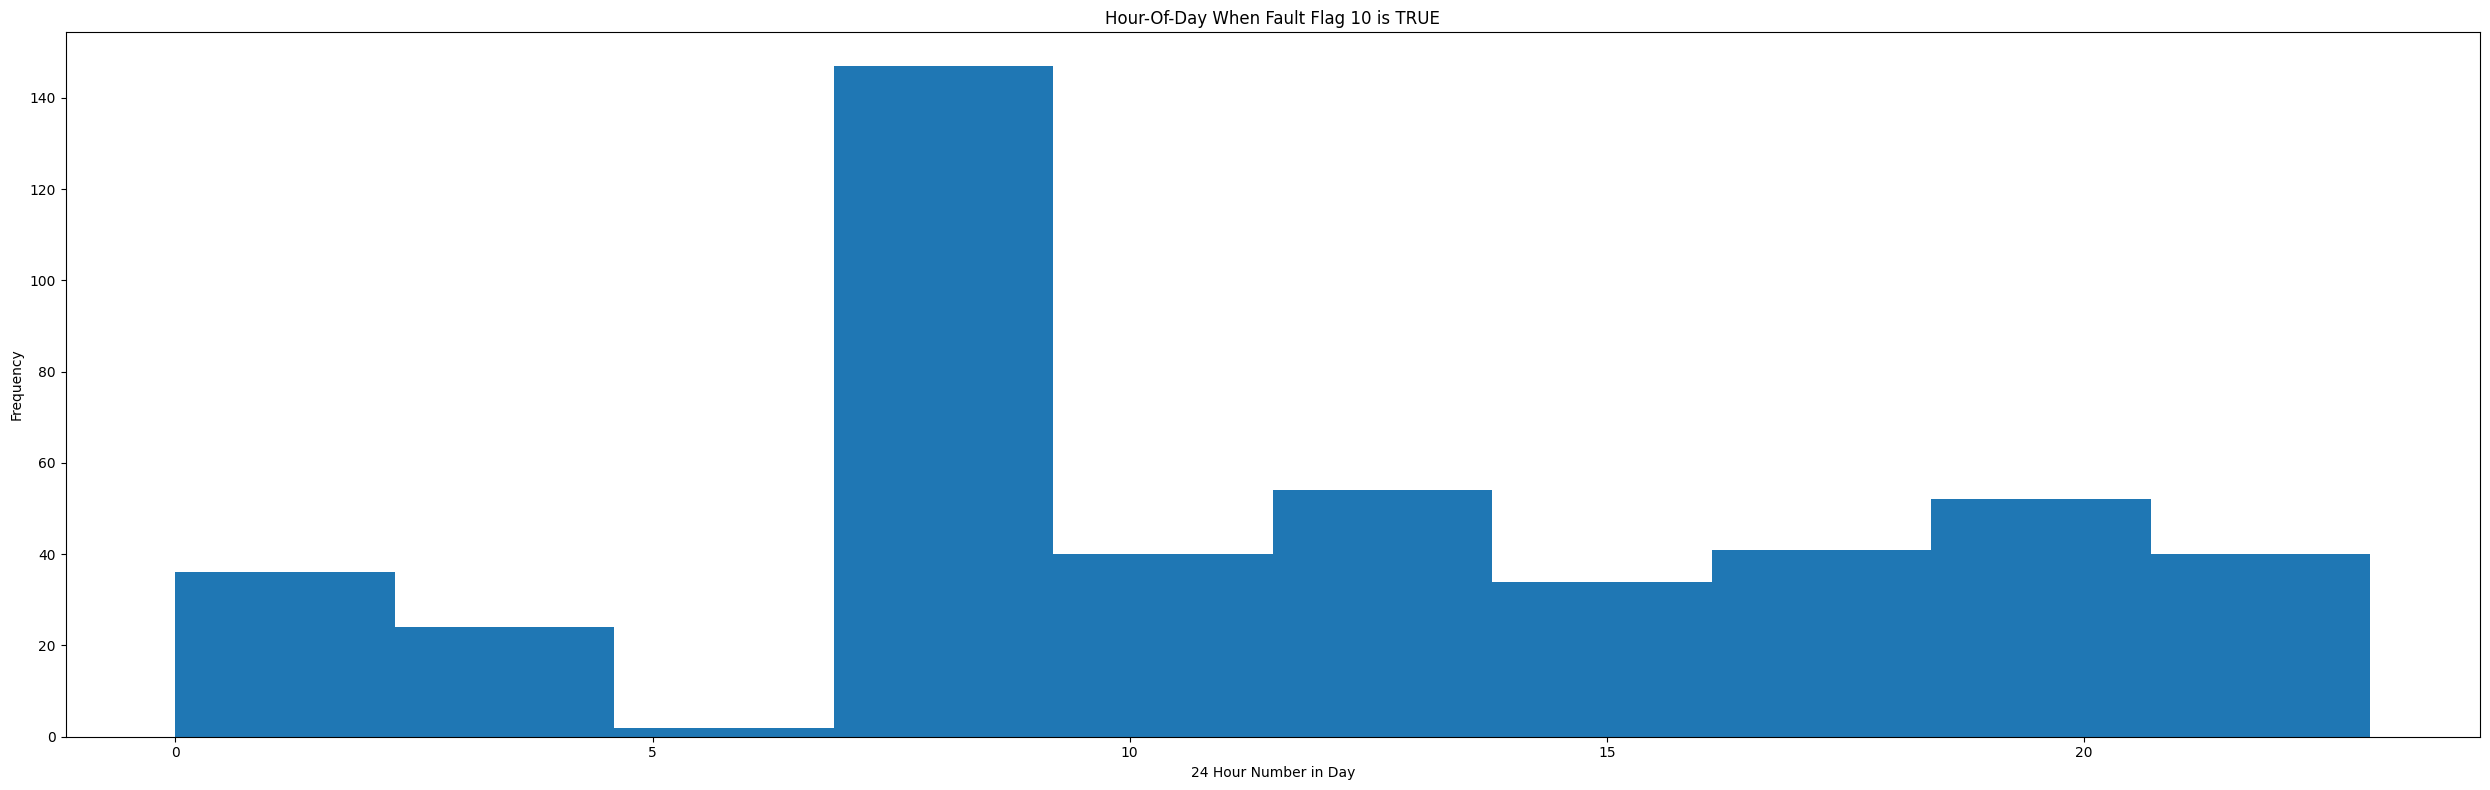

Outside Air Temp Mean When In Fault:  64.88
Mix Air Temp Mean When In Fault:  73.76
The percent True metric that represents the amount of time for when the fault flag is True is low indicating the AHU components are within calibration for this fault equation.


In [24]:
from open_fdd.air_handling_unit.reports.report_fc10 import FaultCodeTenReport

# Create an instance of FaultCodeFourReport
fc10_report = FaultCodeTenReport(config_dict)
fc10_report.display_report_in_ipython(df_combined)

Fault Condition 11: Outside air temperature too low for 100% outside air cooling in economizer mode


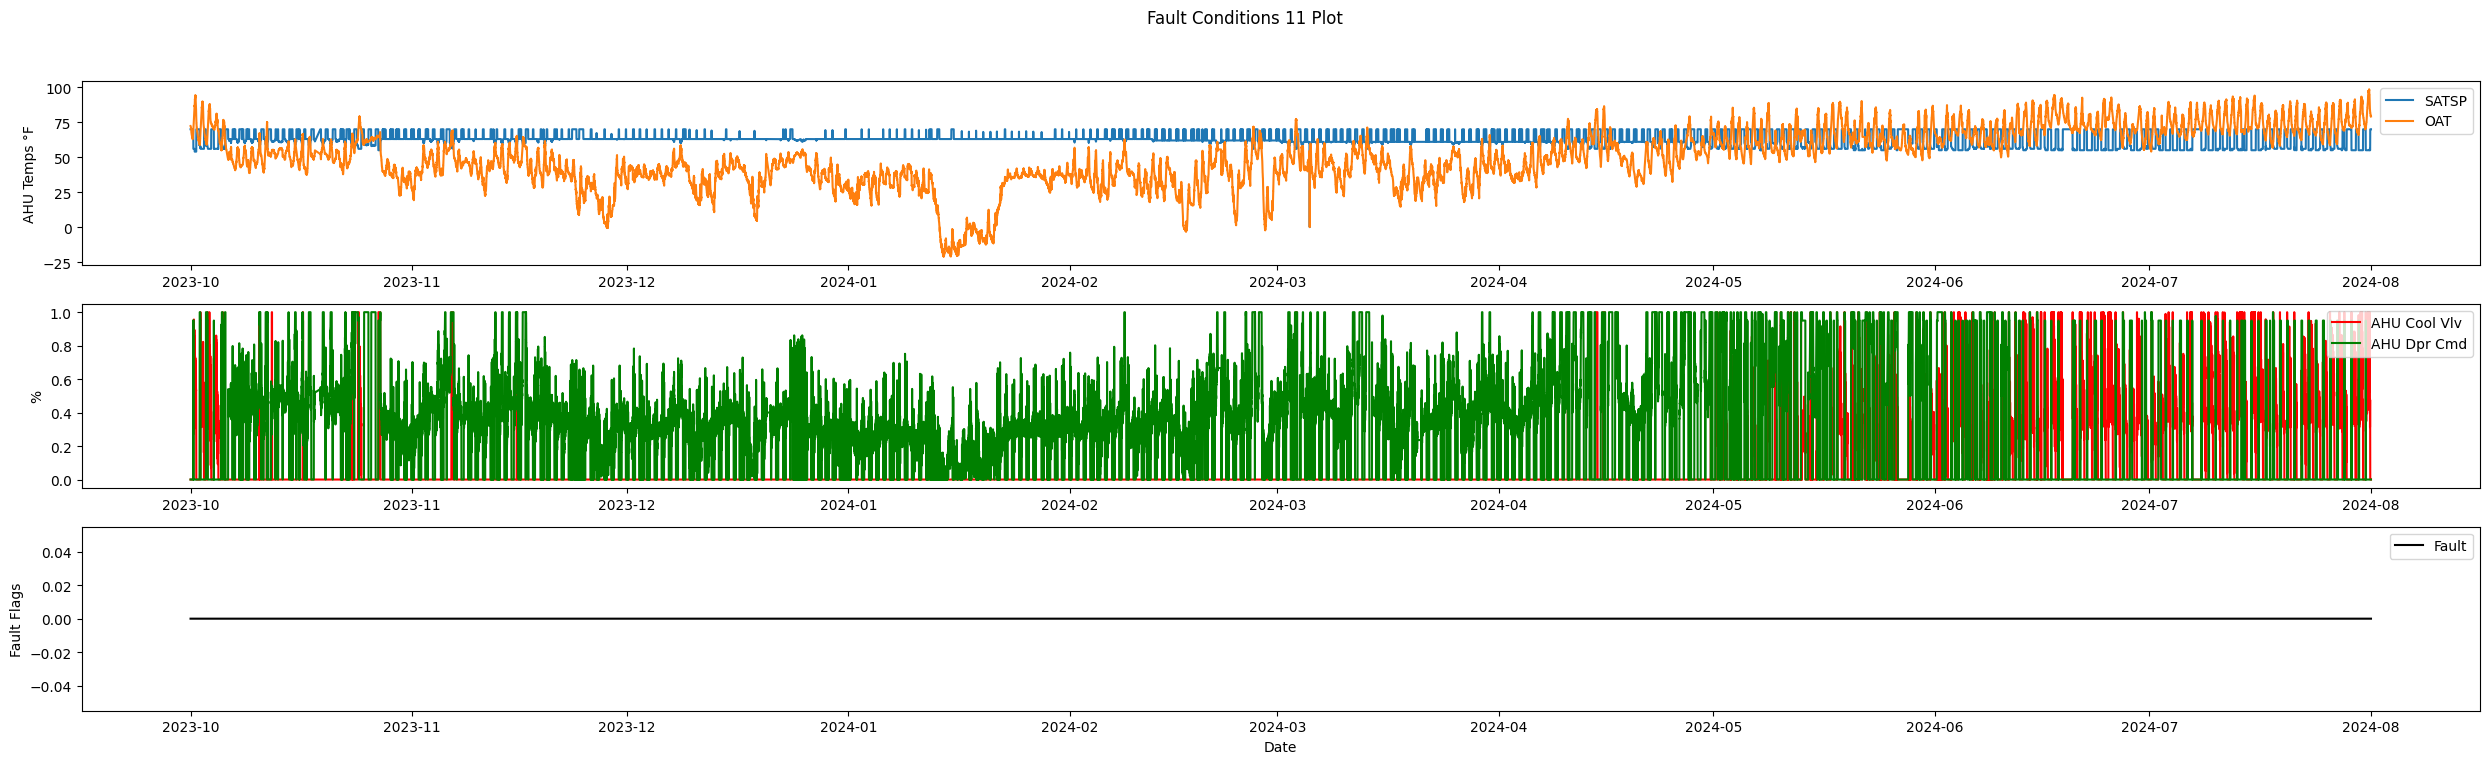

total days: 305.0
total hours: 7320
hours fc11 mode: 0
percent true: 0.0
percent false: 100.0
flag true oat: nan
flag true sat sp: nan
hours motor runtime: 5484.23
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [25]:
from open_fdd.air_handling_unit.reports.report_fc11 import FaultCodeElevenReport

# Create an instance of FaultCodeFourReport
fc11_report = FaultCodeElevenReport(config_dict)
fc11_report.display_report_in_ipython(df_combined)

Fault Condition 12: Supply air temperature too high; should be less than mix air temperature in economizer plus mech cooling mode


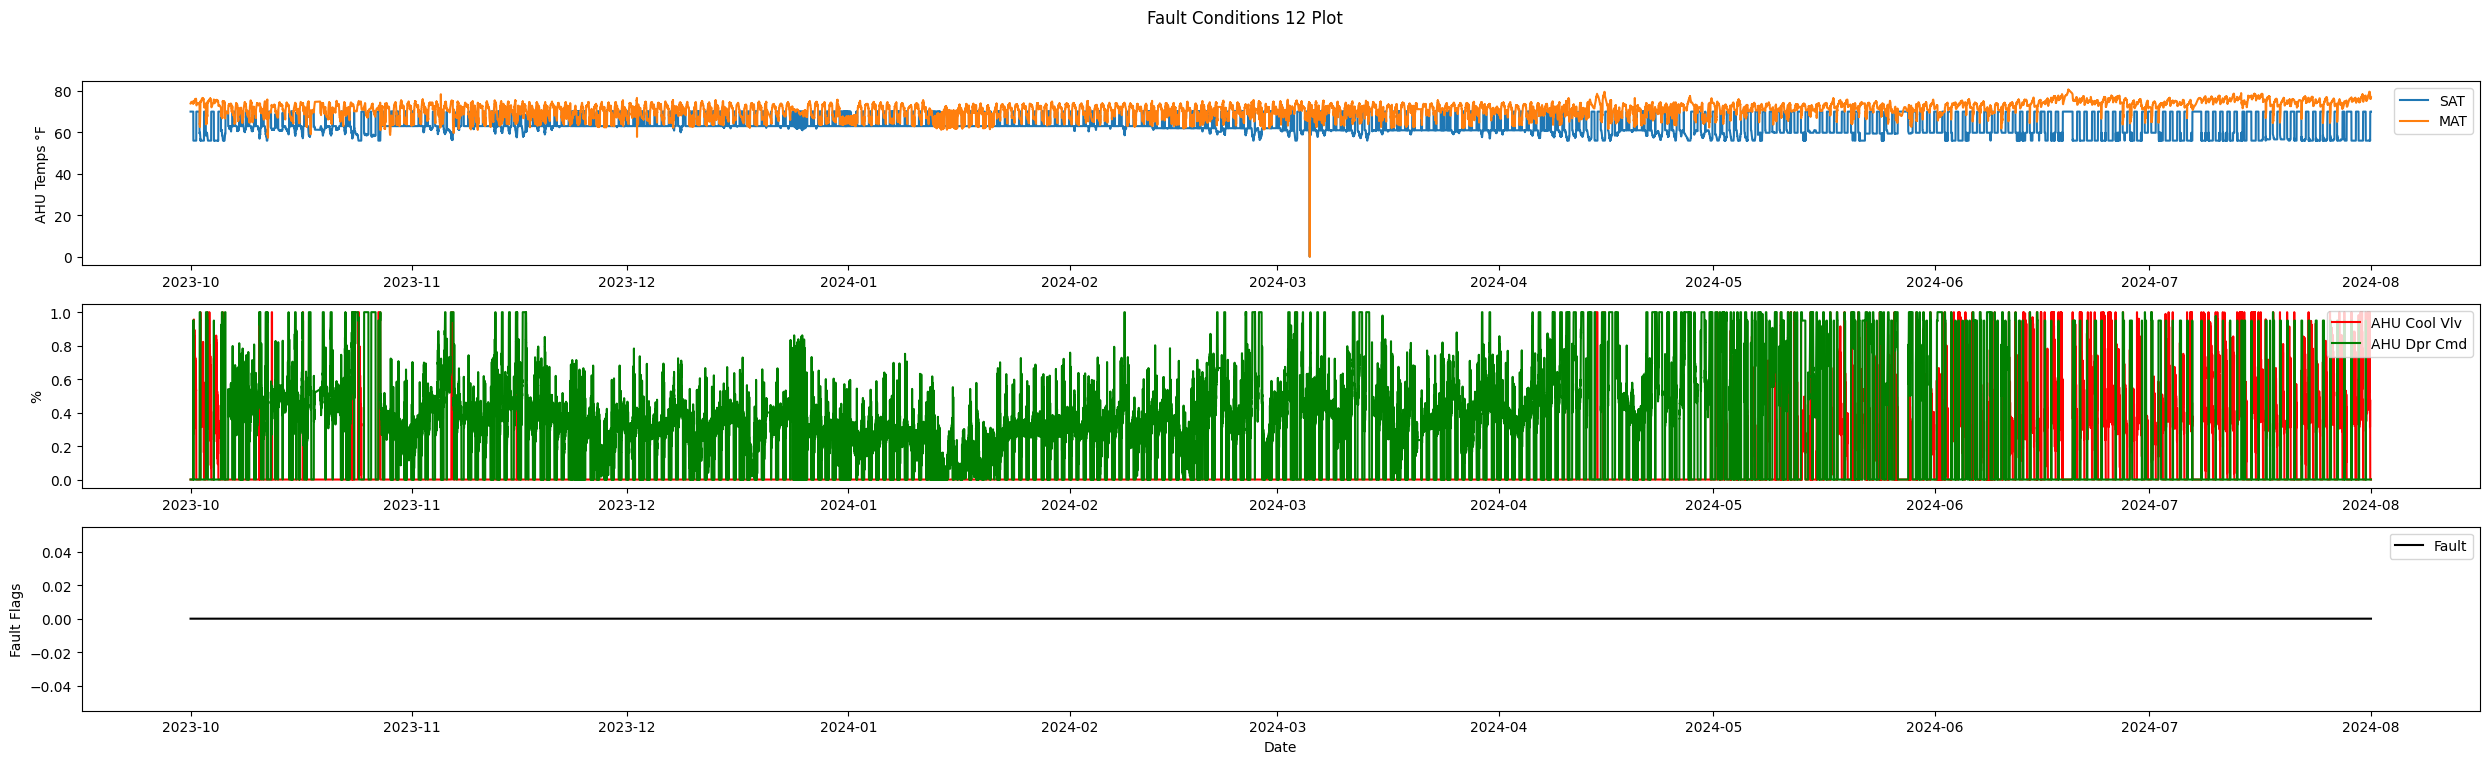

total days: 305.0
total hours: 7320
hours fc12 mode: 0
percent true: 0.0
percent false: 100.0
flag true mat: nan
flag true sat: nan
hours motor runtime: 5484.23
Fault Flag Count:  0
NO FAULTS FOUND - Skipping time-of-day Histogram plot


In [26]:
from open_fdd.air_handling_unit.reports.report_fc12 import FaultCodeTwelveReport

# Create an instance of FaultCodeFourReport
fc12_report = FaultCodeTwelveReport(config_dict)
fc12_report.display_report_in_ipython(df_combined)

Fault Condition 13: Supply air temperature too high in full cooling in economizer plus mech cooling mode


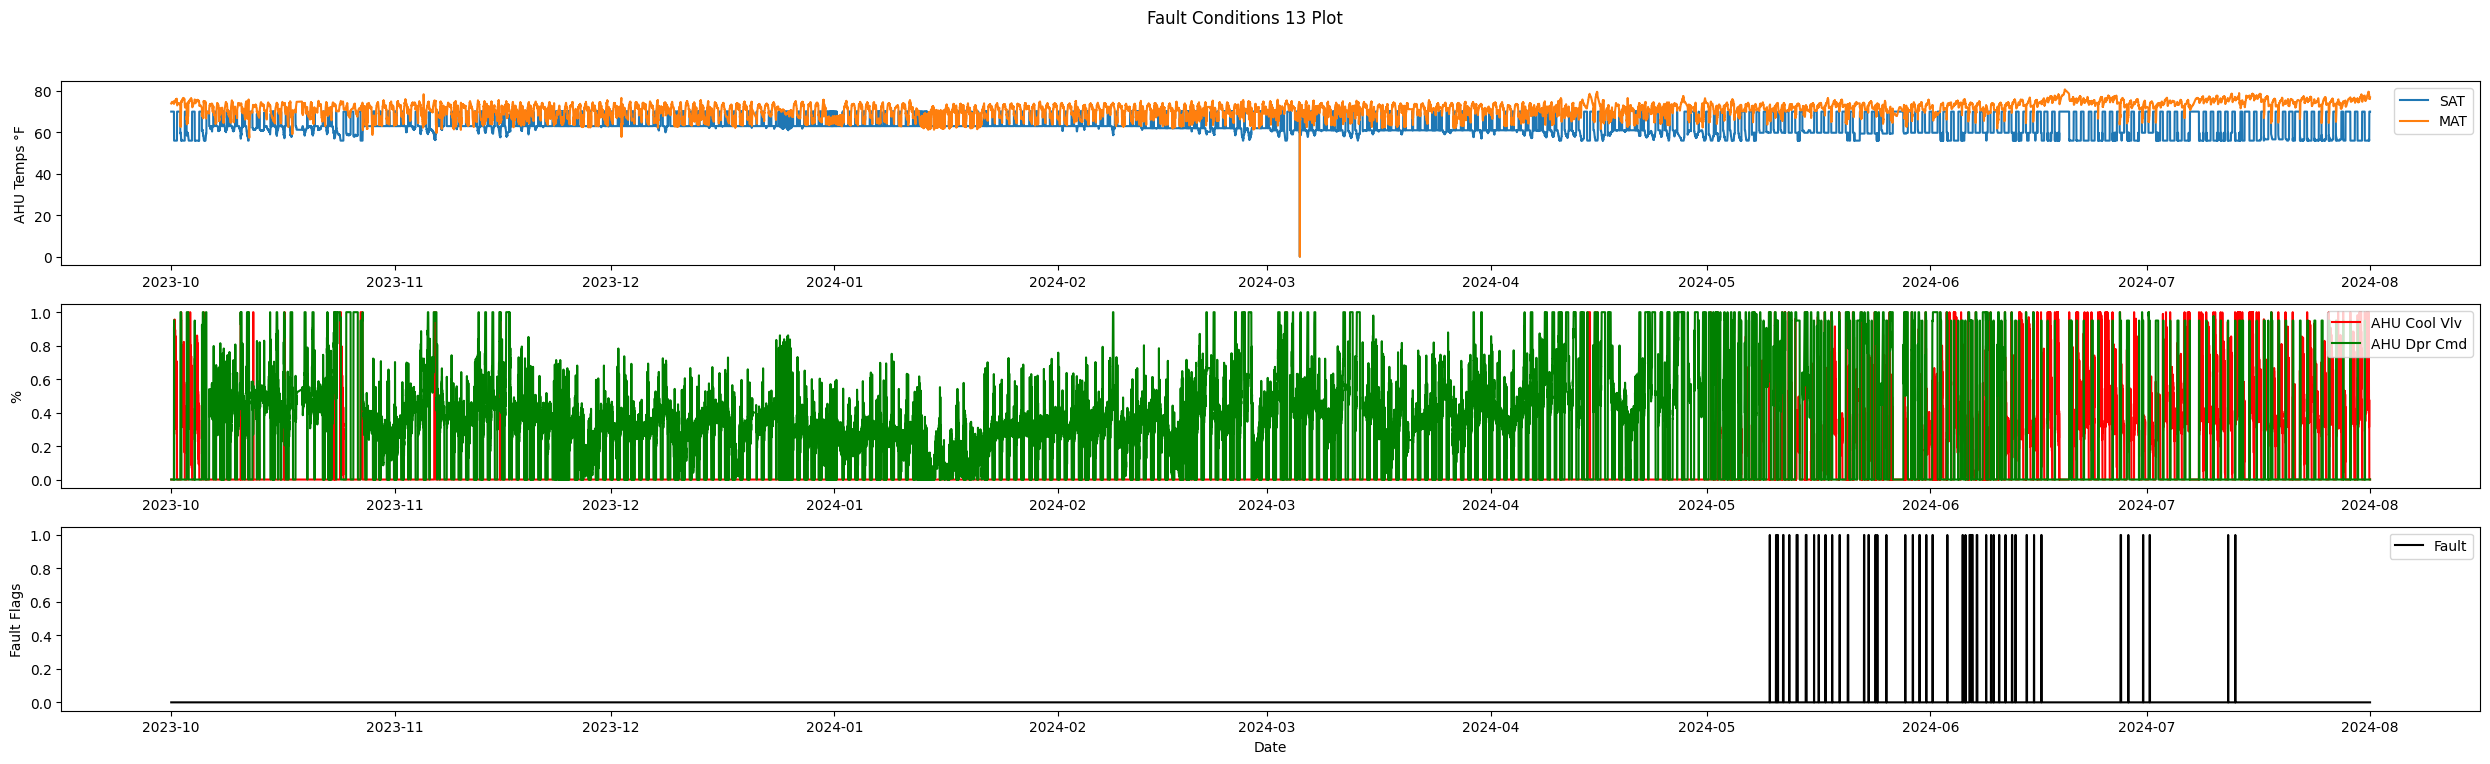

total days: 305.0
total hours: 7320
hours fc13 mode: 55
percent true: 0.66
percent false: 99.34
flag true mat: 73.08
flag true sat: 59.76
hours motor runtime: 5484.23
Fault Flag Count:  1


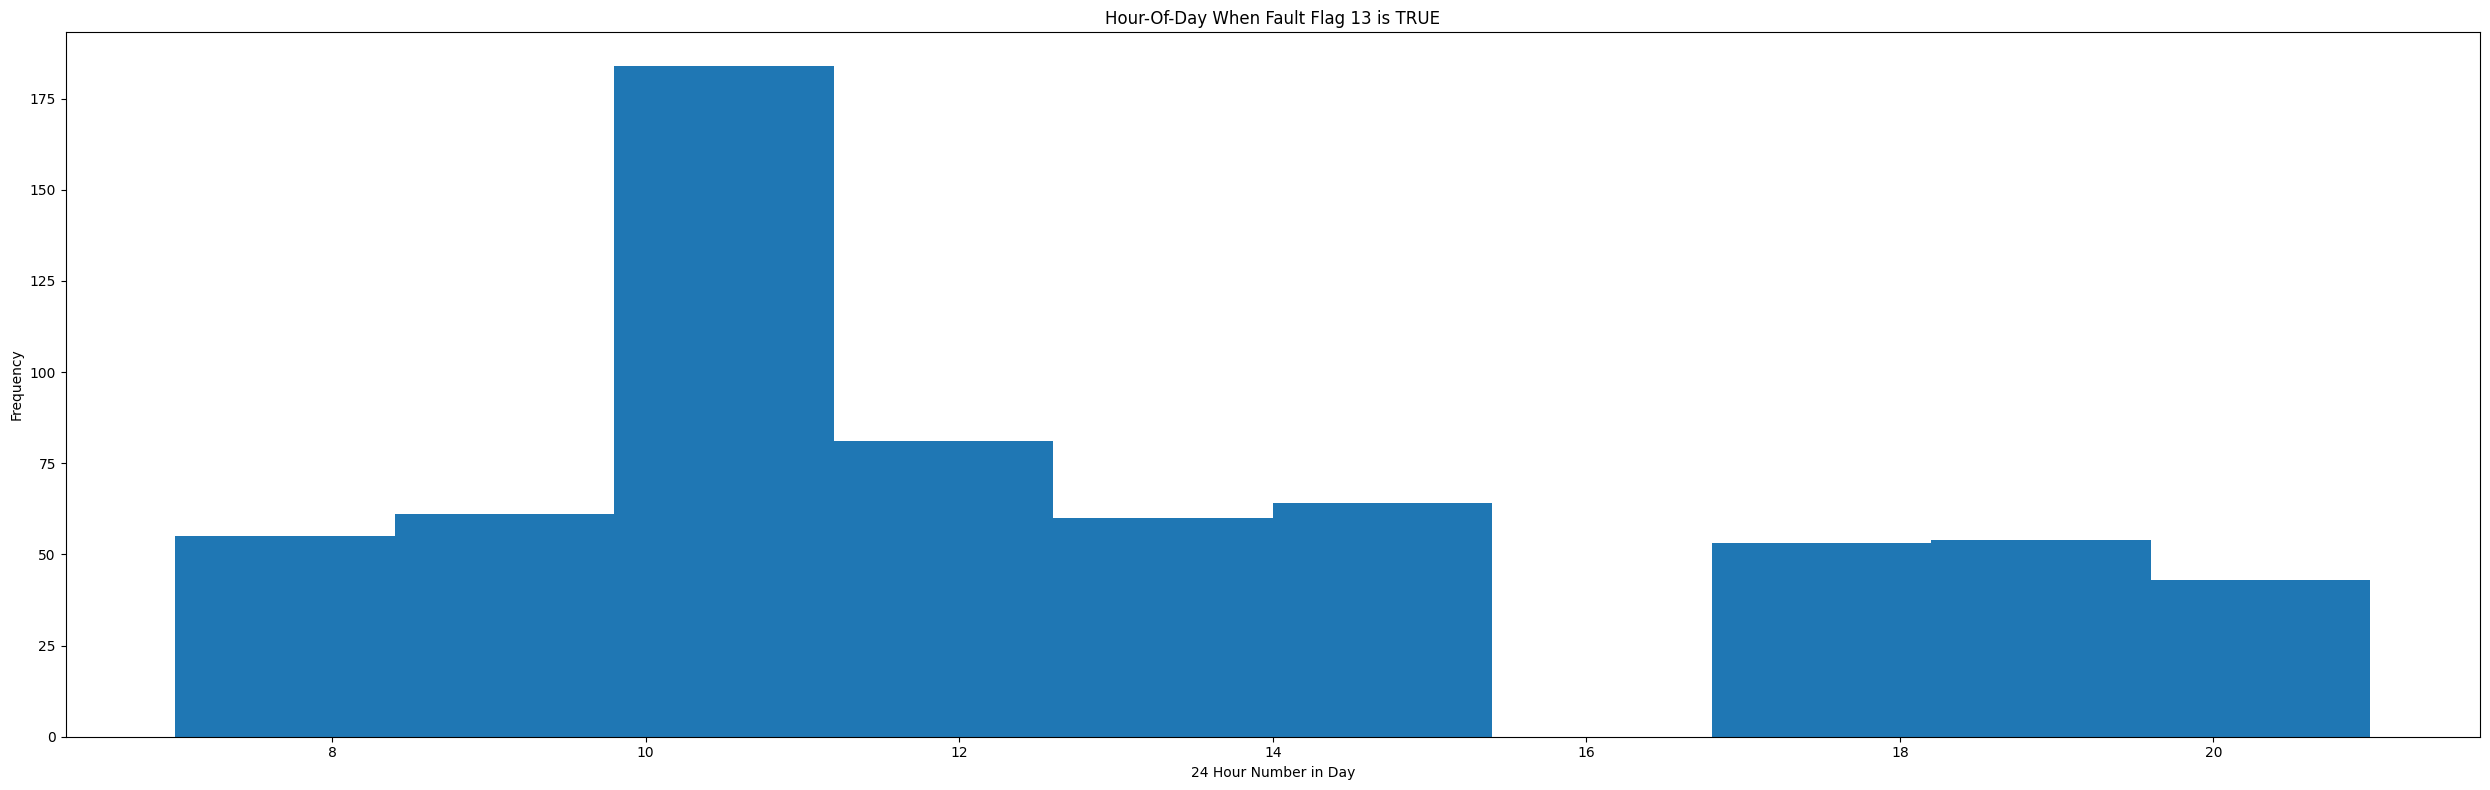

Mix Air Temp Mean When In Fault:  73.08
Supply Air Temp Mean When In Fault:  59.76
The percent True metric that represents the amount of time for when the fault flag is True is low, indicating the AHU components are within calibration for this fault equation.


In [27]:
from open_fdd.air_handling_unit.reports.report_fc13 import FaultCodeThirteenReport

# Create an instance of FaultCodeFourReport
fc13_report = FaultCodeThirteenReport(config_dict)
fc13_report.display_report_in_ipython(df_combined)

<Axes: xlabel='timestamp'>

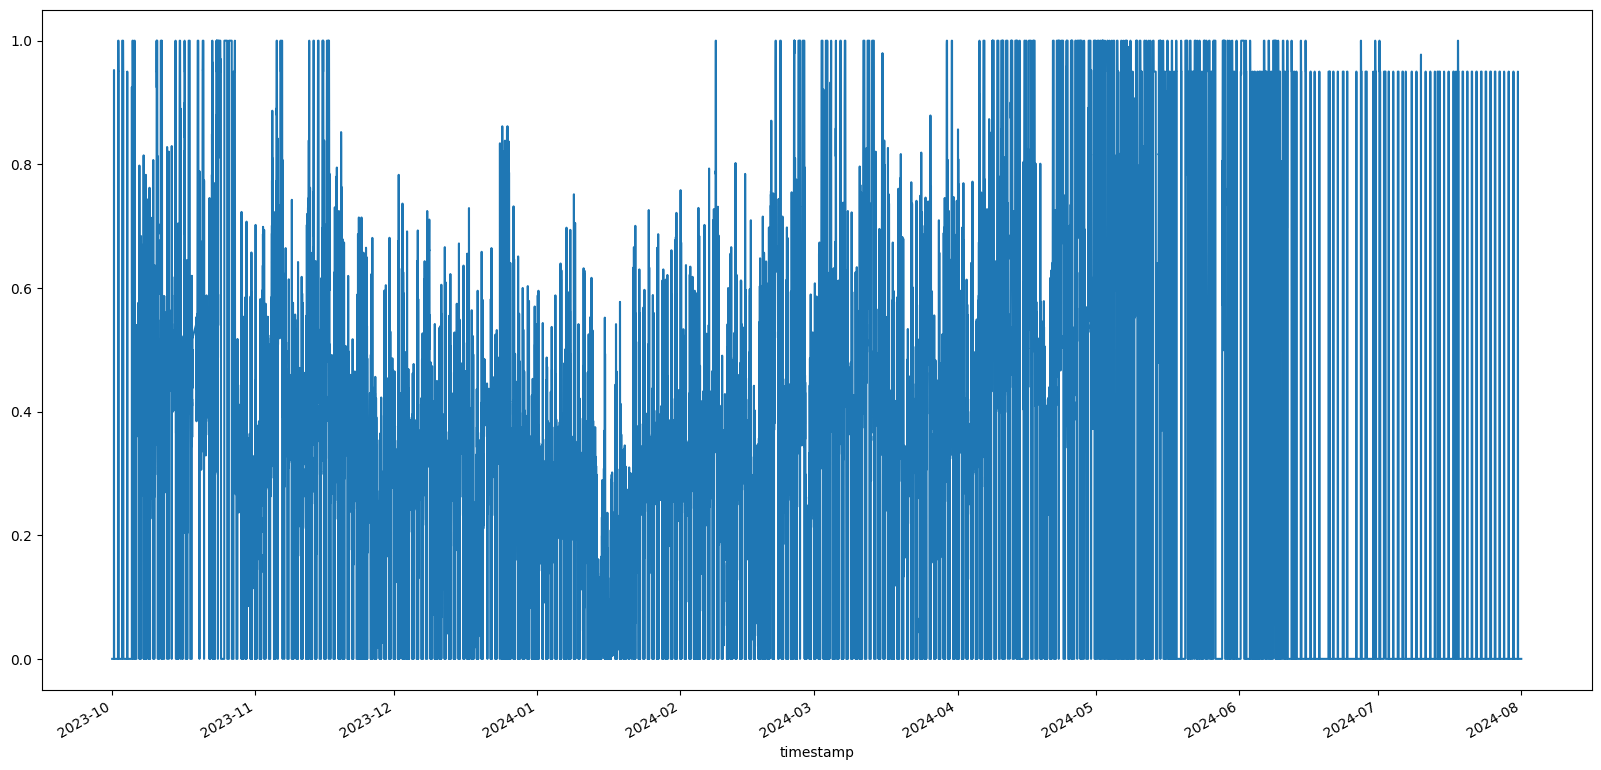

In [28]:
df_combined['Ma_Dampers'].plot(figsize=(20, 10))

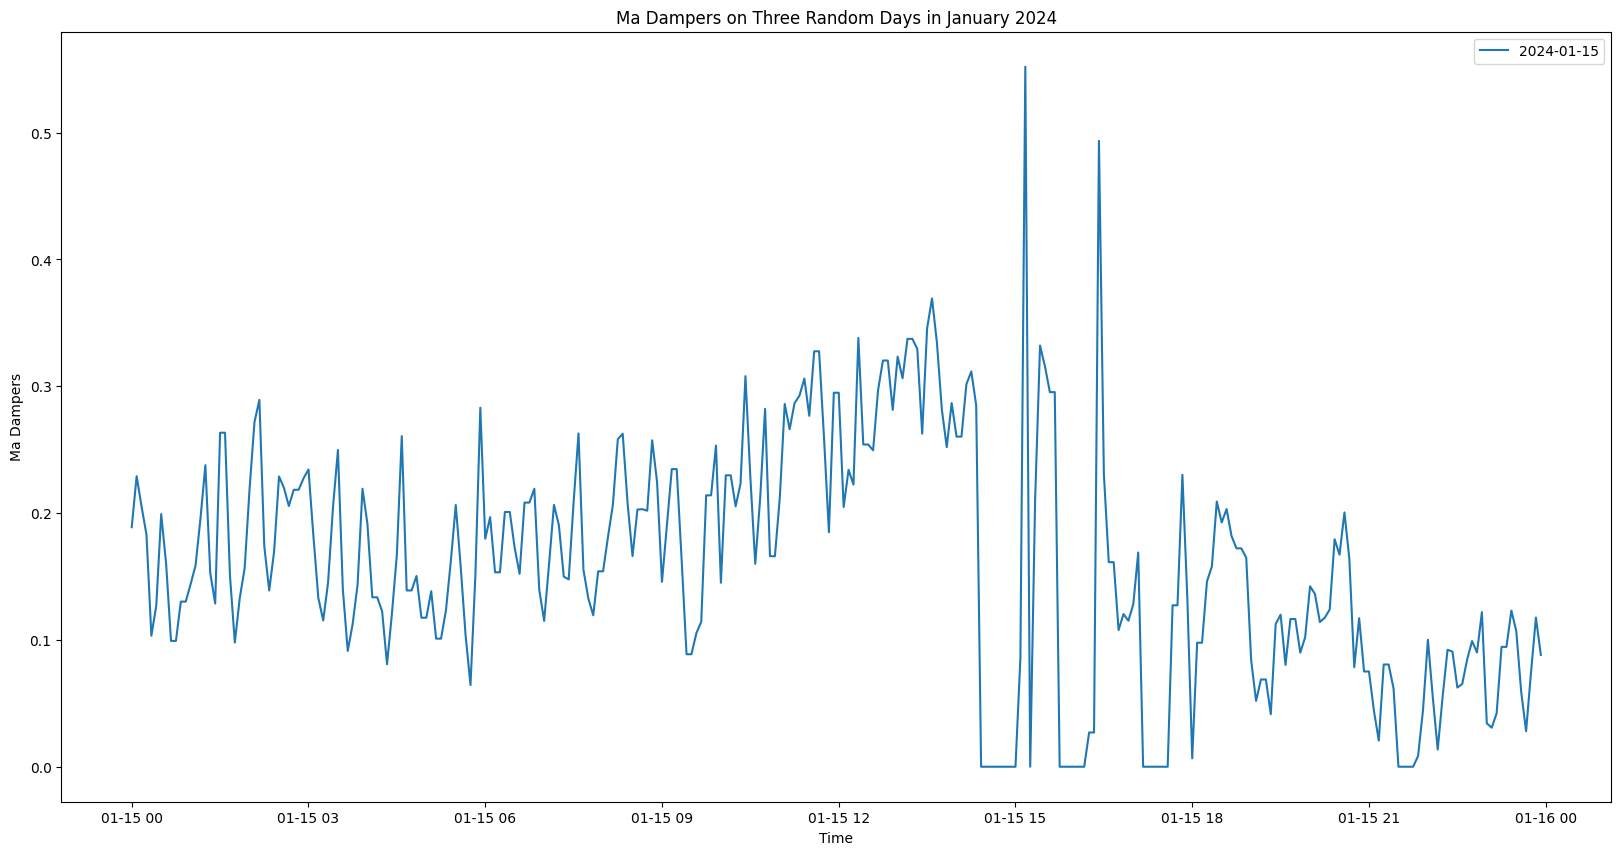

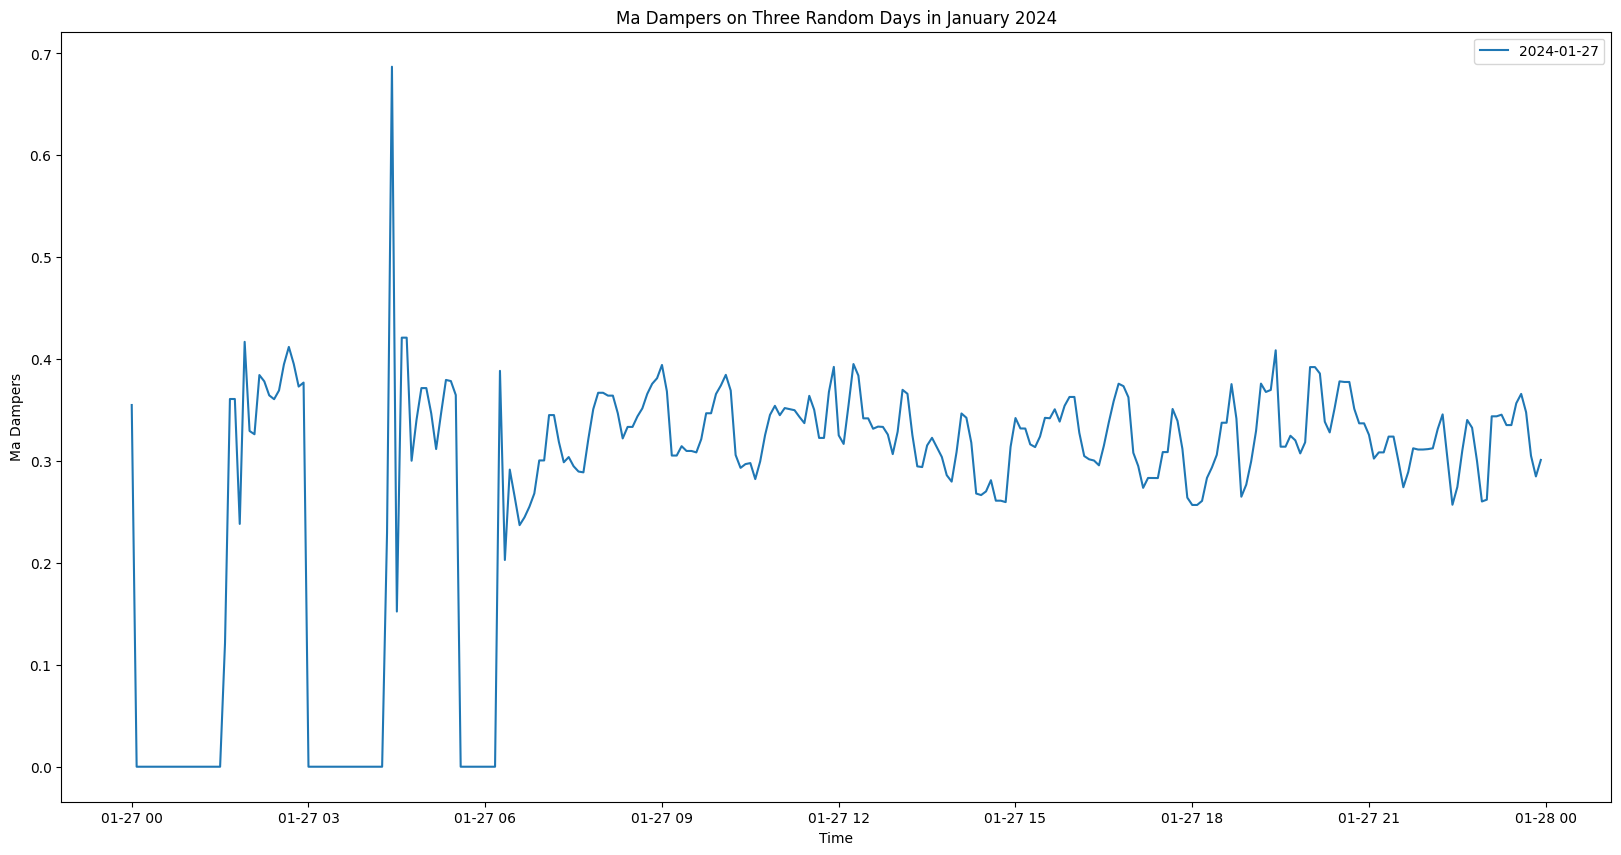

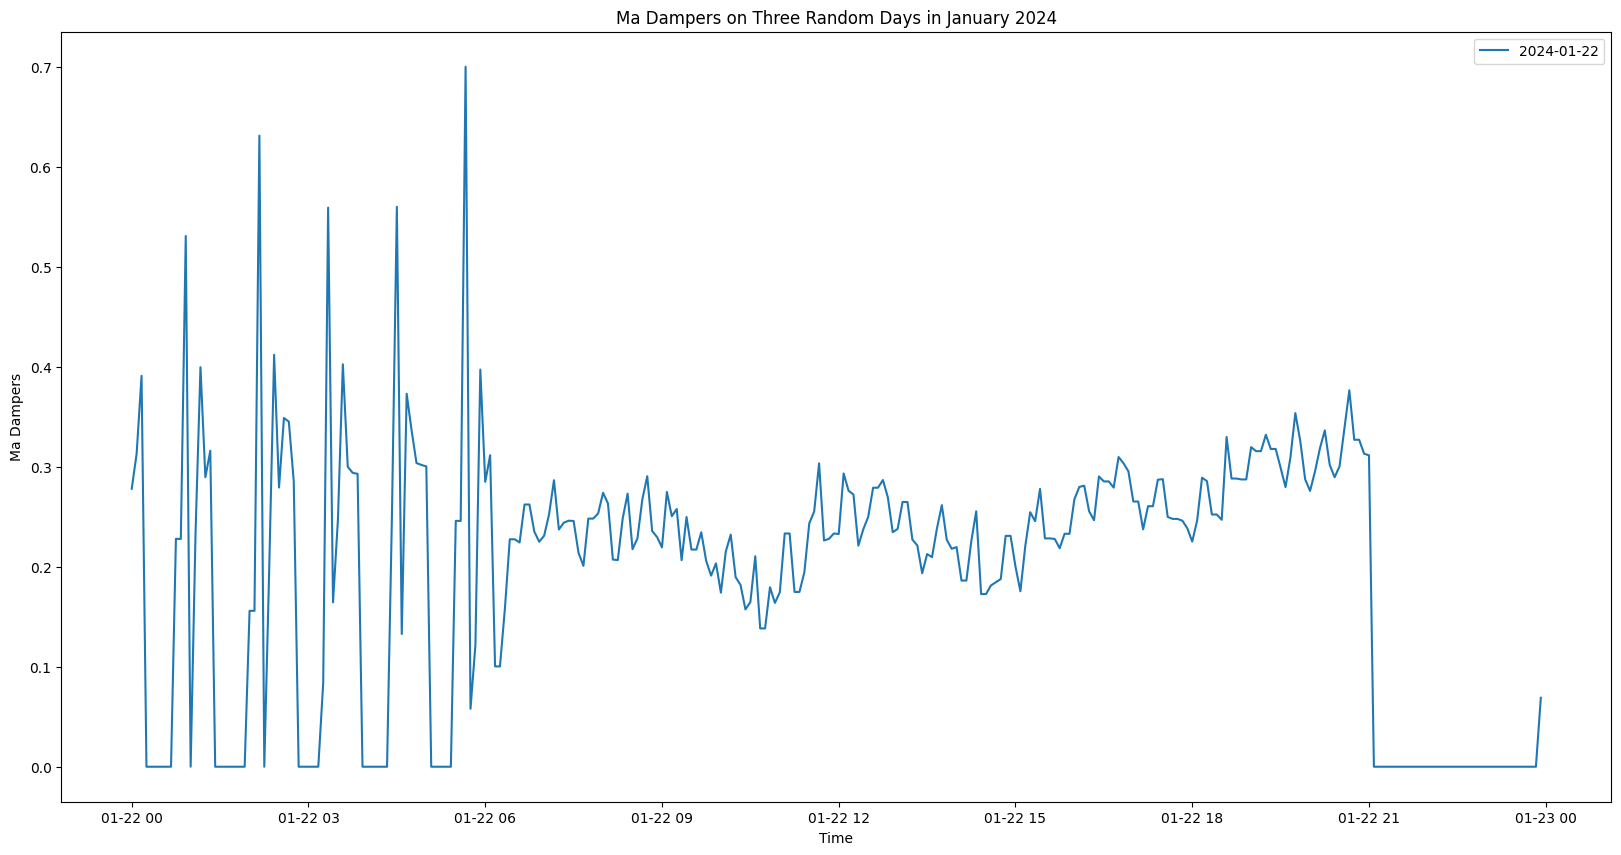

In [29]:
import pandas as pd
import matplotlib.pyplot as plt


# Ensure the DataFrame index is in DateTime format
df_combined.index = pd.to_datetime(df_combined.index)

# Select three random days in January 2024
random_days = pd.date_range(start='2024-01-01', end='2024-01-31', freq='D')
random_days = np.random.choice(random_days, 3, replace=False)


for day in random_days:
    # Plot the 'Ma_Dampers' column for each of the three random days
    plt.figure(figsize=(20, 10))

    day = pd.Timestamp(day)  # Convert numpy.datetime64 to pandas Timestamp
    day_str = day.strftime('%Y-%m-%d')
    df_specific_day = df_combined.loc[day_str]
    plt.plot(df_specific_day.index, df_specific_day['Ma_Dampers'], label=day_str)

    # Set plot title and labels
    plt.title('Ma Dampers on Three Random Days in January 2024')
    plt.xlabel('Time')
    plt.ylabel('Ma Dampers')
    plt.legend()

    # Show the plot
    plt.show()
